In [22]:
import torch
from torch import nn
import torch.utils.data as Data
import torch.optim as optim
import numpy as np
from os.path import join as PJ
import matplotlib.pyplot as plt 

In [23]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image,ImageOps

In [24]:
import tensorflow as tf

In [26]:
def LoadFiles(mode="train"):
    if mode == "train":
        with open(TrainFile, 'r') as trainf:
            image_info = trainf.readlines()
            image_info = [path.strip().split() for path in image_info]
            image_info = np.asarray(image_info)

            # Split to image path and label
            image_paths = image_info[:, 0]
            label_ids = image_info[:, 1].astype(int)

#             labels = tf.one_hot(label_ids, num_class, dtype=tf.int32)
            print("in Load : ", label_ids.shape)
            return image_paths, label_ids
    else:
        with open(TestFile, 'r') as testf:
            image_info = testf.readlines()
            image_info = [path.strip().split() for path in image_info]
            image_info = np.asarray(image_info)

            # Split to image path and label
            image_paths = image_info[:, 0]
            label_ids = image_info[:, 1].astype(int)
#             labels = tf.one_hot(label_ids, num_class, dtype=tf.int32)
            return image_paths, label_ids

In [27]:
import cv2
class TermiteDataset(Dataset):
    def __init__(self, data_file, transform):
        with open(data_file, 'r') as f:
            image_info = f.readlines()
        image_info = [path.strip().split() for path in image_info]
        image_info = np.asarray(image_info)

        # Split to image path and label
        self.image_paths = image_info[:, 0]
        self.label_ids = image_info[:, 1].astype(int)
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
#         print(idx, self.label_ids.shape, self.label_ids[idx])
        label = self.label_ids[idx]
        image_path = self.image_paths[idx]
        original_image = Image.open(image_path).convert('RGB')
        
#         print(original_image.size)
        
        if original_image.size[0] > 1000:
            original_image = original_image.resize((1000, original_image.size[1]*1000//original_image.size[0]))
        elif original_image.size[1] > 1000:
            original_image = original_image.resize((original_image.size[0]*1000//original_image.size[1], 1000))
#         print(original_image.shape)
        left = 500-original_image.size[0]//2
        right = 500-original_image.size[0]//2
        top = 500-original_image.size[1]//2
        bottom = 500-original_image.size[1]//2
        
        if left + right + original_image.size[0] != 1000:
            right = 1000 - left - original_image.size[0]
        if top + bottom + original_image.size[1] != 1000:
            top = 1000 - bottom - original_image.size[1]
        
#         original_image= cv2.copyMakeBorder(original_image,left,right,top,bottom,cv2.BORDER_CONSTANT,value=(0, 0, 0))
        original_image = ImageOps.expand(original_image, border=(left,top,right,bottom), fill=0)##left,top,right,bottom
        original_image = original_image.resize((130,130))
        transform1 = transforms.Compose([transforms.ToTensor()])
        original_image = transform1(original_image)
#         print(original_image.shape)
        
        
#         original_image = self.transform(original_image)
#         original_image.permute(2,0,1)
#         print(original_image.shape, answer.shape)
        return label, original_image, self.image_paths[idx]

def transform_set(train, new_size=None, pad=None):
    """
    train: True or False
    new_size: int or tuple
    
    """
#     transform_list = [transforms.ToTensor(),
#                       transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])]
    transform_list = [transforms.ToTensor()]
    # replace centercrop to padding
#     transform_list = [transforms.CenterCrop((crop_h, crop_w))] + transform_list if crop else transform_list
#     transform_list = [transforms.Resize(new_size)] + transform_list if new_size is not None else transform_list

#     transform_list = [transforms.RandomHorizontalFlip()] + transform_list if train else transform_list
    transform = transforms.Compose(transform_list)
    return transform

In [28]:
def CheckFile(filename):
    with open(filename, 'r') as f:
            image_info = f.readlines()
    image_info = [path.strip().split() for path in image_info]
    image_info = np.asarray(image_info)
    counts = {"台灣土白蟻兵蟻" : 0,
             "台灣土白蟻工蟻" : 0,
             "台灣家白蟻兵蟻" : 0,
             "台灣家白蟻工蟻" : 0,
             "截頭堆沙兵蟻" : 0,
             "截頭堆沙工蟻" : 0,
             "黃肢散工蟻" : 0,
             "黃肢散兵蟻" : 0,
             "背景": 0}
        
    Locations = {"L1" : 0,
             "L2" : 0,
             "L3" : 0}
    for line in image_info:
        path = line[0]
        if "L1" in path:
            Locations["L1"] += 1
        if "L2" in path:
            Locations["L2"] += 1
        if "L3" in path:
            Locations["L3"] += 1
        if "台灣土白蟻兵蟻" in path:
            counts["台灣土白蟻兵蟻"] += 1
        if "台灣土白蟻工蟻" in path:
            counts["台灣土白蟻工蟻"] += 1
        if "台灣家白蟻兵蟻" in path:
            counts["台灣家白蟻兵蟻"] += 1
        if "台灣家白蟻工蟻" in path:
            counts["台灣家白蟻工蟻"] += 1
        if "截頭堆沙兵蟻" in path:
            counts["截頭堆沙兵蟻"] += 1
        if "截頭堆沙工蟻" in path:
            counts["截頭堆沙工蟻"] += 1
        if "黃肢散兵蟻" in path:
            counts["黃肢散兵蟻"] += 1
        if "黃肢散工蟻" in path:
            counts["黃肢散工蟻"] += 1
        if "背景" in path:
            counts["背景"] += 1
    print(Locations, counts)

In [29]:
BATCH_SIZE = 64
EPOCH = 100
LearningRate = 0.0001
Momentum = 0.9
TrainFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_trainfile_1_200aug.txt"
ValFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_valfile_1_200aug.txt"
TestFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_testfile_1.txt"
# classes = ["O. formosanus Army","O. formosanus Worker", "C. formosanus Army","C. formosanus Worker", "C. domesticus Army","C. domesticus Worker", "R. flaviceps Worker", "R. flaviceps Army"]
classes = ["O.f Soldier","O.f Worker", "C.f Soldier","C.f Worker", "C.d Soldier","C.d Worker", "R.f Soldier", "R.f Worker"]
model_directory = "/home/ytliu/Termite-Bonnie/PAPER_termite/*BENCHMARK-LARGE_1_200aug/"
testresult_directory = "/home/ytliu/Termite-Bonnie/PAPER_termite/*BENCHMARK-LARGE_1_200aug/"

In [1]:
print("TrainFile : ", TrainFile)
print("ValidationFile : ", ValFile)
print("TestFile : ", TestFile)
CheckFile(TrainFile)
CheckFile(ValFile)
CheckFile(TestFile)

NameError: name 'TrainFile' is not defined

In [ ]:
import torchvision.models as models
import os
# from MobileNetV2 import MobileNetV2
print(torch.__version__)
torch.cuda.set_device(0)
print(torch.cuda.current_device())
# mobilenet =  MobileNetV2(n_class=len(classes)).cuda()
mobilenet =  nn.Sequential(models.mobilenet_v2(pretrained=True), nn.Linear(1000, len(classes))).cuda()

1.3.0
0


In [ ]:
model = mobilenet
# model = MobileNet(len(classes))
# model.to(cuda)
# model = model.cuda()
model = model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LearningRate, momentum=Momentum)

In [ ]:
transform = transform_set(train=True)
trainset = TermiteDataset(TrainFile, transform)
trainloader = Data.DataLoader(
    dataset=trainset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [ ]:
transform2 = transform_set(train=False)
valset = TermiteDataset(ValFile, transform2)
valloader = Data.DataLoader(
    dataset=valset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [ ]:
# for labels, images in loader:
#     print(labels.shape)
#     print(images.shape)
#     ssssss

# TRAIN
### 
### validation

Train
[1, 00020] loss: 46.538 acc: 0.233
[1, 00040] loss: 76.939 acc: 0.354
[1, 00060] loss: 100.453 acc: 0.431
[1, 00080] loss: 120.242 acc: 0.486
[1, 00100] loss: 137.702 acc: 0.525
[1, 00120] loss: 153.103 acc: 0.560
[1, 00140] loss: 168.316 acc: 0.583
[1, 00160] loss: 182.485 acc: 0.602
[1, 00180] loss: 195.529 acc: 0.620
[1, 00200] loss: 207.979 acc: 0.636
[0.63609375]
[207.97899934649467]


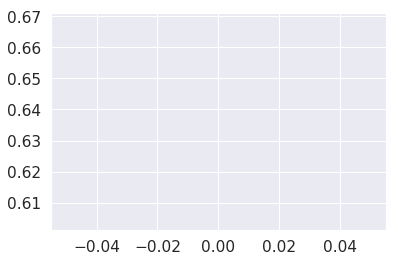

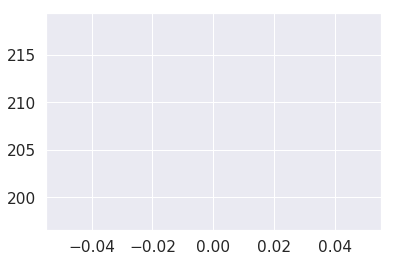

Validation
[0.779375]
[30.875142335891724]


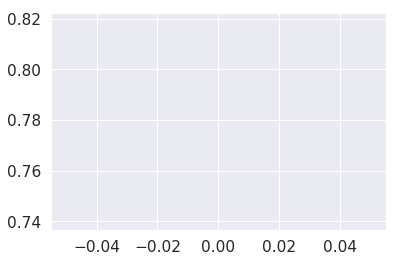

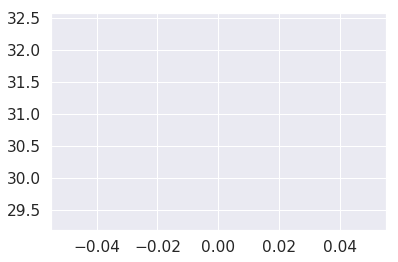


[1] accuracy: 0.779 loss: 30.875

runtime :  277.88592982292175
Train
[2, 00020] loss: 10.096 acc: 0.830
[2, 00040] loss: 20.021 acc: 0.825
[2, 00060] loss: 29.157 acc: 0.828
[2, 00080] loss: 38.198 acc: 0.831
[2, 00100] loss: 46.859 acc: 0.834
[2, 00120] loss: 55.100 acc: 0.837
[2, 00140] loss: 63.511 acc: 0.840
[2, 00160] loss: 70.738 acc: 0.844
[2, 00180] loss: 78.372 acc: 0.846
[2, 00200] loss: 86.744 acc: 0.847
[0.63609375, 0.847109375]
[207.97899934649467, 86.74440161883831]


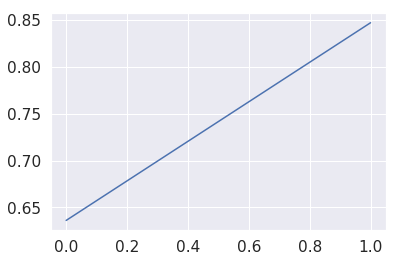

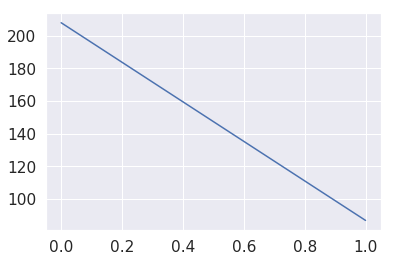

Validation
[0.779375, 0.848125]
[30.875142335891724, 20.32009506225586]


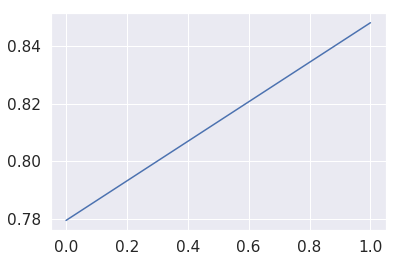

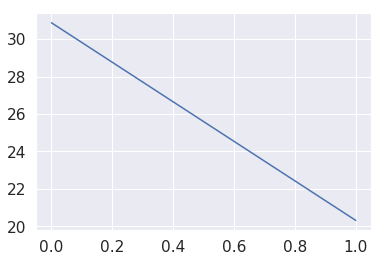


[2] accuracy: 0.848 loss: 20.320

runtime :  553.5330603122711
Train
[3, 00020] loss: 6.998 acc: 0.884
[3, 00040] loss: 13.517 acc: 0.886
[3, 00060] loss: 19.409 acc: 0.892
[3, 00080] loss: 25.568 acc: 0.890
[3, 00100] loss: 32.077 acc: 0.891
[3, 00120] loss: 37.600 acc: 0.893
[3, 00140] loss: 43.269 acc: 0.892
[3, 00160] loss: 48.876 acc: 0.893
[3, 00180] loss: 54.566 acc: 0.894
[3, 00200] loss: 59.770 acc: 0.896
[0.63609375, 0.847109375, 0.895625]
[207.97899934649467, 86.74440161883831, 59.77049741894007]


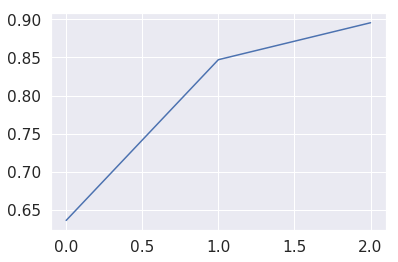

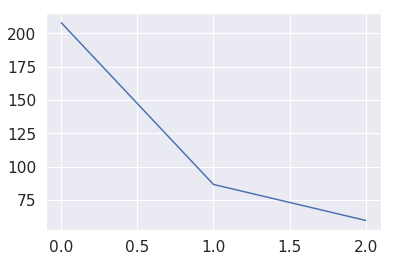

Validation
[0.779375, 0.848125, 0.8809375]
[30.875142335891724, 20.32009506225586, 16.161957800388336]


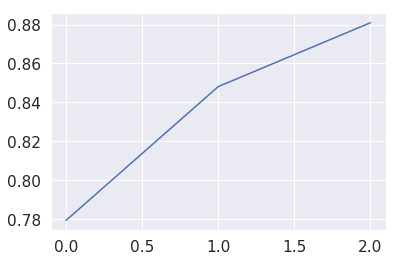

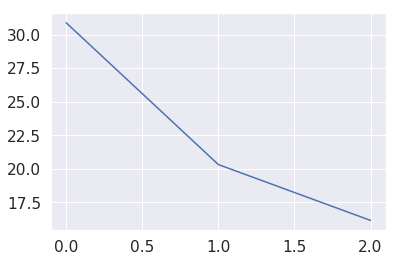


[3] accuracy: 0.881 loss: 16.162

runtime :  828.616201877594
Train
[4, 00020] loss: 5.035 acc: 0.912
[4, 00040] loss: 9.819 acc: 0.908
[4, 00060] loss: 14.640 acc: 0.910
[4, 00080] loss: 18.735 acc: 0.915
[4, 00100] loss: 23.116 acc: 0.918
[4, 00120] loss: 27.450 acc: 0.920
[4, 00140] loss: 31.485 acc: 0.920
[4, 00160] loss: 35.400 acc: 0.922
[4, 00180] loss: 39.982 acc: 0.922
[4, 00200] loss: 44.491 acc: 0.923
[0.63609375, 0.847109375, 0.895625, 0.923203125]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744]


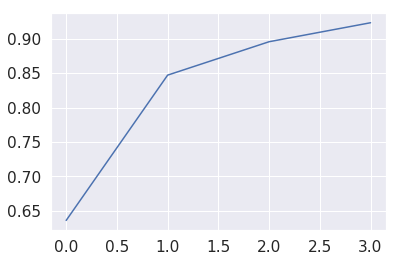

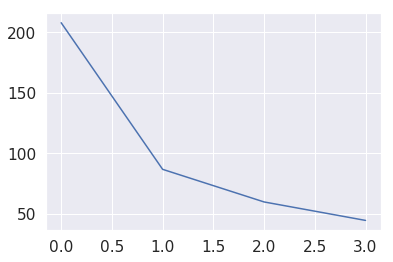

Validation
[0.779375, 0.848125, 0.8809375, 0.89875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526]


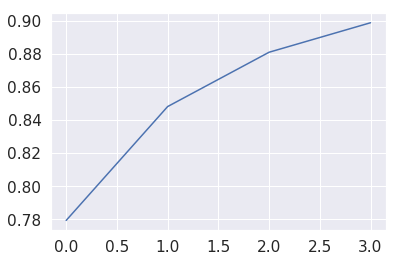

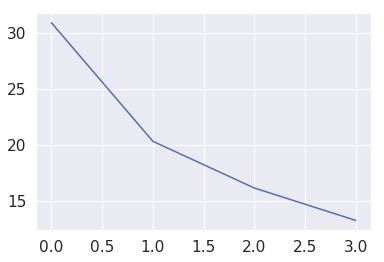


[4] accuracy: 0.899 loss: 13.277

runtime :  1105.689166545868
Train
[5, 00020] loss: 3.736 acc: 0.935
[5, 00040] loss: 7.162 acc: 0.939
[5, 00060] loss: 10.469 acc: 0.940
[5, 00080] loss: 13.651 acc: 0.941
[5, 00100] loss: 17.338 acc: 0.941
[5, 00120] loss: 20.773 acc: 0.941
[5, 00140] loss: 24.033 acc: 0.942
[5, 00160] loss: 27.410 acc: 0.943
[5, 00180] loss: 30.320 acc: 0.944
[5, 00200] loss: 33.246 acc: 0.944
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309]


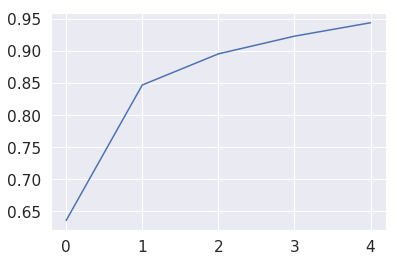

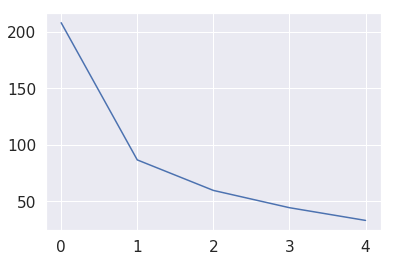

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962]


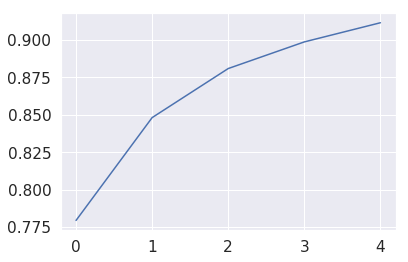

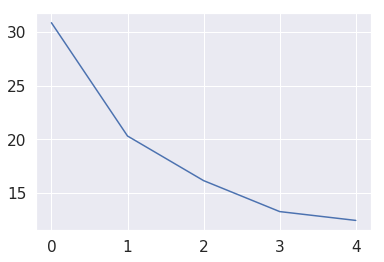


[5] accuracy: 0.912 loss: 12.453

runtime :  1578.2936079502106
Train
[6, 00020] loss: 2.773 acc: 0.958
[6, 00040] loss: 5.675 acc: 0.957
[6, 00060] loss: 8.187 acc: 0.959
[6, 00080] loss: 10.896 acc: 0.956
[6, 00100] loss: 13.346 acc: 0.957
[6, 00120] loss: 16.018 acc: 0.957
[6, 00140] loss: 18.544 acc: 0.957
[6, 00160] loss: 21.247 acc: 0.956
[6, 00180] loss: 24.106 acc: 0.956
[6, 00200] loss: 26.913 acc: 0.955
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492]


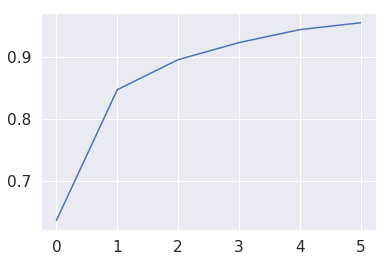

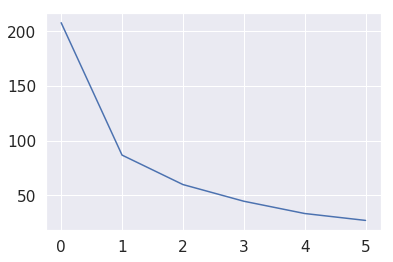

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302]


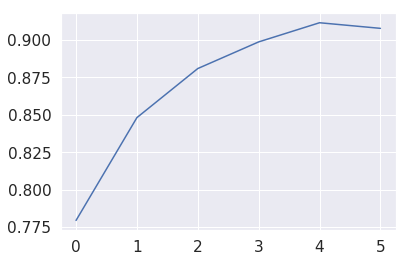

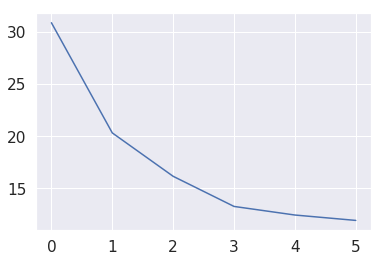


[6] accuracy: 0.908 loss: 11.937

runtime :  2090.8826808929443
Train
[7, 00020] loss: 2.130 acc: 0.970
[7, 00040] loss: 4.478 acc: 0.964
[7, 00060] loss: 6.526 acc: 0.966
[7, 00080] loss: 9.013 acc: 0.965
[7, 00100] loss: 11.149 acc: 0.965
[7, 00120] loss: 13.188 acc: 0.966
[7, 00140] loss: 15.161 acc: 0.968
[7, 00160] loss: 17.296 acc: 0.967
[7, 00180] loss: 19.242 acc: 0.967
[7, 00200] loss: 21.152 acc: 0.968
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548]


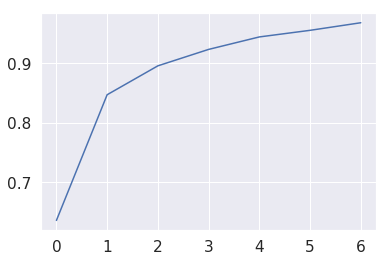

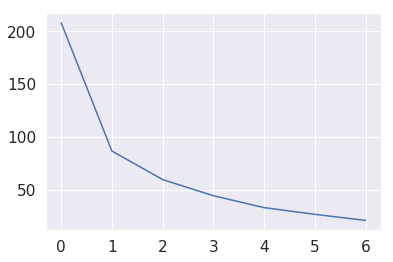

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537]


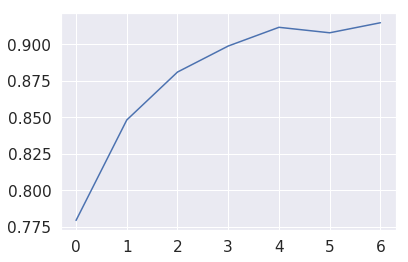

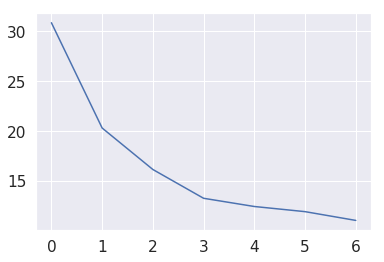


[7] accuracy: 0.915 loss: 11.058

runtime :  2603.227559566498
Train
[8, 00020] loss: 1.387 acc: 0.980
[8, 00040] loss: 3.243 acc: 0.973
[8, 00060] loss: 4.761 acc: 0.976
[8, 00080] loss: 6.909 acc: 0.973
[8, 00100] loss: 8.621 acc: 0.973
[8, 00120] loss: 10.444 acc: 0.973
[8, 00140] loss: 12.144 acc: 0.972
[8, 00160] loss: 13.819 acc: 0.972
[8, 00180] loss: 15.566 acc: 0.972
[8, 00200] loss: 17.119 acc: 0.973
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727]


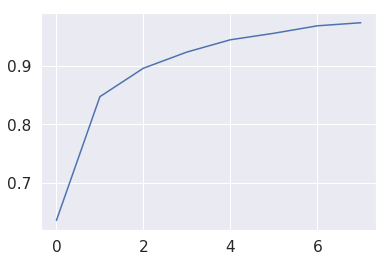

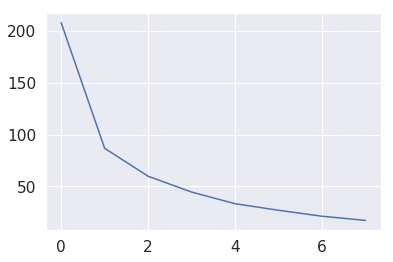

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565]


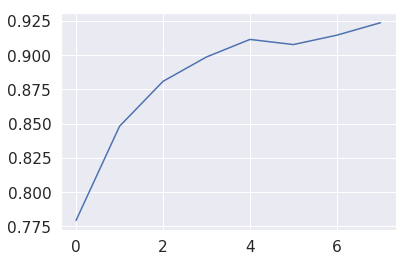

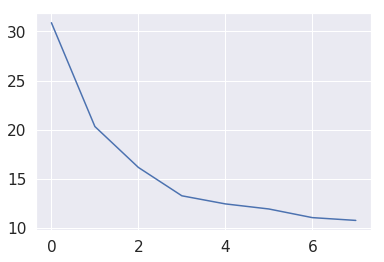


[8] accuracy: 0.924 loss: 10.773

runtime :  3111.591522216797
Train
[9, 00020] loss: 1.406 acc: 0.981
[9, 00040] loss: 2.838 acc: 0.982
[9, 00060] loss: 4.112 acc: 0.981
[9, 00080] loss: 5.516 acc: 0.979
[9, 00100] loss: 7.026 acc: 0.979
[9, 00120] loss: 8.518 acc: 0.978
[9, 00140] loss: 10.207 acc: 0.977
[9, 00160] loss: 11.783 acc: 0.977
[9, 00180] loss: 13.230 acc: 0.976
[9, 00200] loss: 14.671 acc: 0.976
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846]


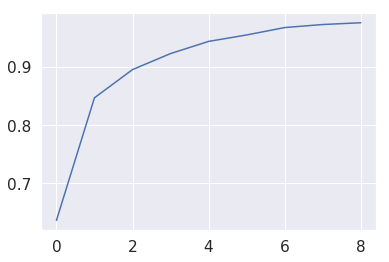

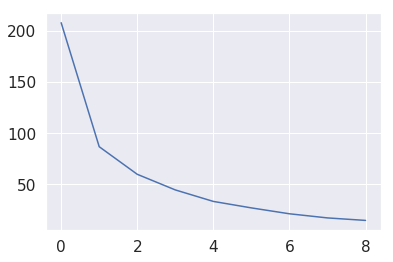

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319]


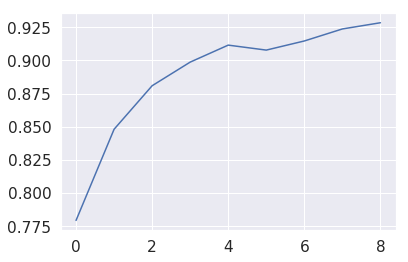

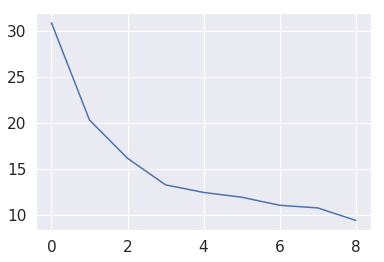


[9] accuracy: 0.928 loss: 9.416

runtime :  3621.5085475444794
Train
[10, 00020] loss: 1.315 acc: 0.978
[10, 00040] loss: 2.489 acc: 0.981
[10, 00060] loss: 3.481 acc: 0.983
[10, 00080] loss: 4.588 acc: 0.982
[10, 00100] loss: 5.889 acc: 0.981
[10, 00120] loss: 6.990 acc: 0.982
[10, 00140] loss: 8.165 acc: 0.982
[10, 00160] loss: 9.154 acc: 0.983
[10, 00180] loss: 10.419 acc: 0.982
[10, 00200] loss: 11.424 acc: 0.983
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081]


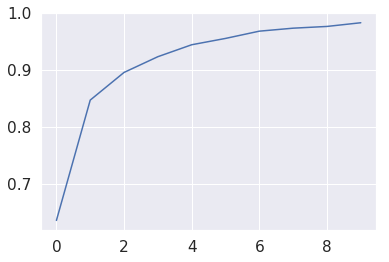

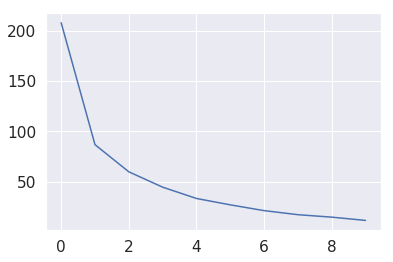

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911]


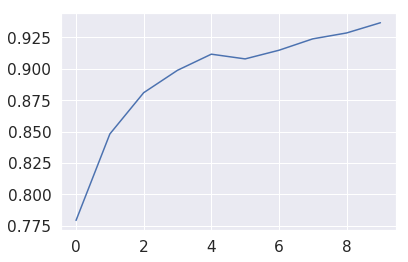

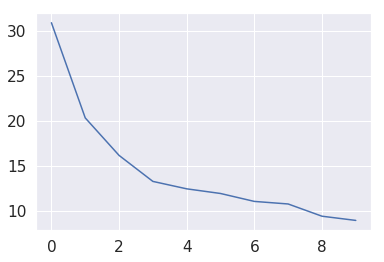


[10] accuracy: 0.937 loss: 8.949

runtime :  4128.096168041229
Train
[11, 00020] loss: 0.895 acc: 0.987
[11, 00040] loss: 1.808 acc: 0.987
[11, 00060] loss: 2.642 acc: 0.989
[11, 00080] loss: 3.653 acc: 0.988
[11, 00100] loss: 4.568 acc: 0.989
[11, 00120] loss: 5.480 acc: 0.988
[11, 00140] loss: 6.512 acc: 0.987
[11, 00160] loss: 7.692 acc: 0.986
[11, 00180] loss: 8.725 acc: 0.986
[11, 00200] loss: 9.808 acc: 0.986
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012]


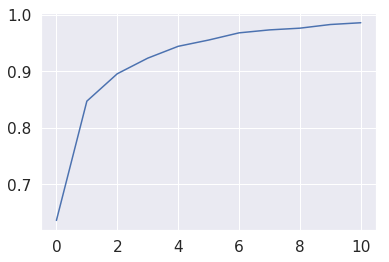

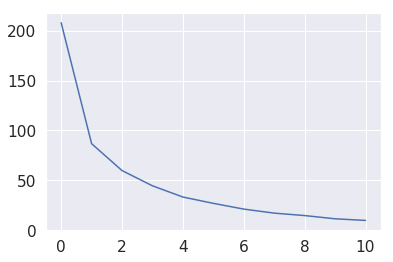

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176]


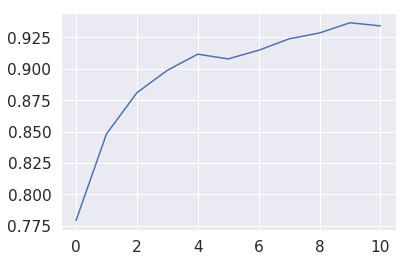

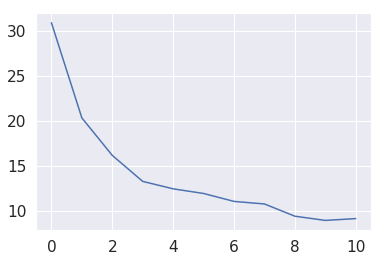


[11] accuracy: 0.934 loss: 9.152

runtime :  4639.33559513092
Train
[12, 00020] loss: 0.924 acc: 0.984
[12, 00040] loss: 1.531 acc: 0.988
[12, 00060] loss: 2.366 acc: 0.988
[12, 00080] loss: 3.203 acc: 0.988
[12, 00100] loss: 4.199 acc: 0.988
[12, 00120] loss: 4.904 acc: 0.989
[12, 00140] loss: 5.724 acc: 0.989
[12, 00160] loss: 6.523 acc: 0.989
[12, 00180] loss: 7.519 acc: 0.988
[12, 00200] loss: 8.451 acc: 0.989
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553]


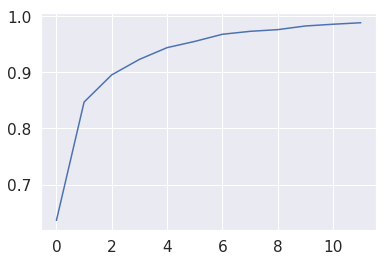

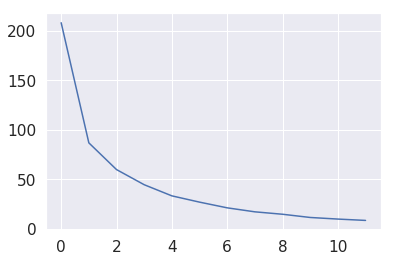

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604]


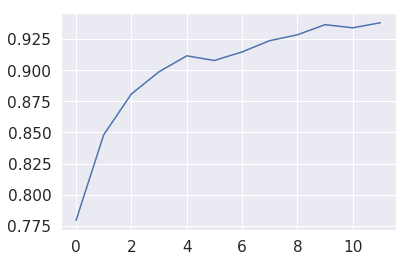

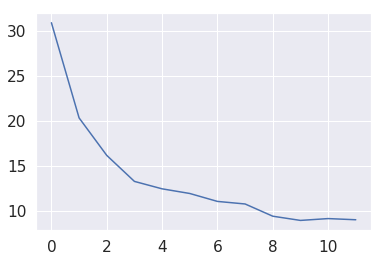


[12] accuracy: 0.938 loss: 9.023

runtime :  5151.674979925156
Train
[13, 00020] loss: 0.686 acc: 0.991
[13, 00040] loss: 1.322 acc: 0.991
[13, 00060] loss: 1.934 acc: 0.993
[13, 00080] loss: 2.535 acc: 0.993
[13, 00100] loss: 3.203 acc: 0.992
[13, 00120] loss: 3.790 acc: 0.993
[13, 00140] loss: 4.297 acc: 0.993
[13, 00160] loss: 5.045 acc: 0.993
[13, 00180] loss: 5.634 acc: 0.993
[13, 00200] loss: 6.303 acc: 0.992
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215]


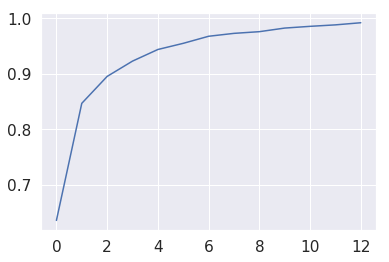

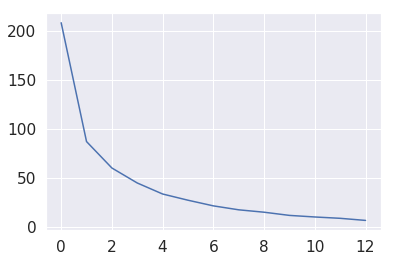

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095]


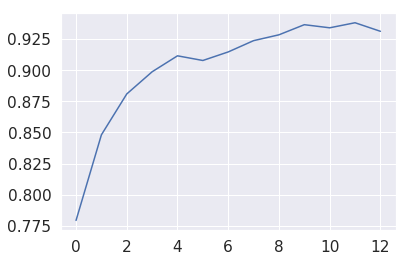

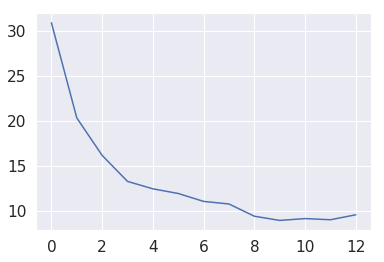


[13] accuracy: 0.931 loss: 9.575

runtime :  5664.573751449585
Train
[14, 00020] loss: 0.952 acc: 0.982
[14, 00040] loss: 1.577 acc: 0.987
[14, 00060] loss: 2.147 acc: 0.990
[14, 00080] loss: 2.852 acc: 0.990
[14, 00100] loss: 3.549 acc: 0.990
[14, 00120] loss: 4.249 acc: 0.990
[14, 00140] loss: 5.080 acc: 0.990
[14, 00160] loss: 5.613 acc: 0.990
[14, 00180] loss: 6.082 acc: 0.991
[14, 00200] loss: 6.677 acc: 0.991
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608]


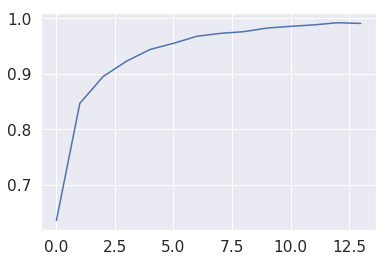

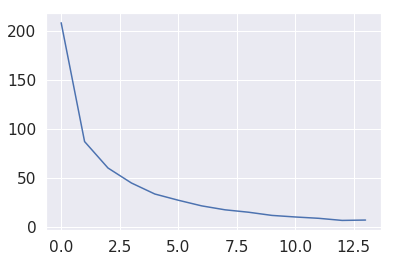

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068]


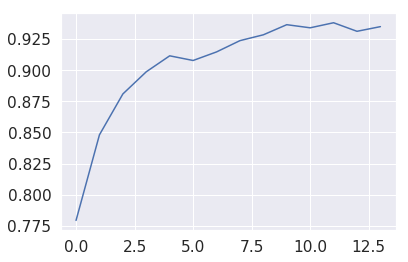

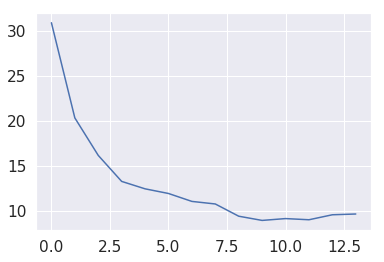


[14] accuracy: 0.935 loss: 9.661

runtime :  6181.597102403641
Train
[15, 00020] loss: 0.474 acc: 0.994
[15, 00040] loss: 1.166 acc: 0.993
[15, 00060] loss: 1.839 acc: 0.992
[15, 00080] loss: 2.541 acc: 0.992
[15, 00100] loss: 3.160 acc: 0.992
[15, 00120] loss: 3.642 acc: 0.992
[15, 00140] loss: 4.276 acc: 0.992
[15, 00160] loss: 4.954 acc: 0.992
[15, 00180] loss: 5.600 acc: 0.992
[15, 00200] loss: 6.199 acc: 0.992
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608, 6.199482839554548]


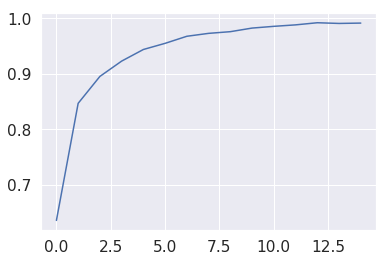

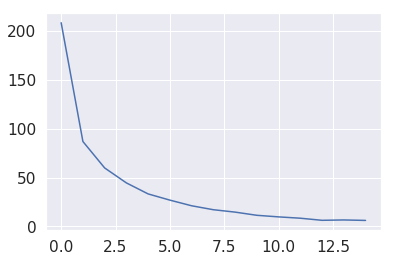

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752]


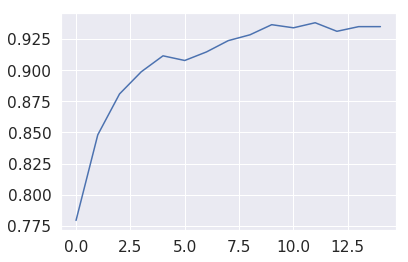

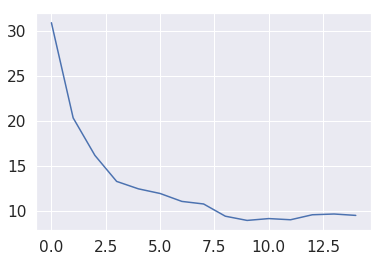


[15] accuracy: 0.935 loss: 9.505

runtime :  6692.976026535034
Train
[16, 00020] loss: 0.470 acc: 0.992
[16, 00040] loss: 0.959 acc: 0.993
[16, 00060] loss: 1.445 acc: 0.994
[16, 00080] loss: 1.974 acc: 0.994
[16, 00100] loss: 2.358 acc: 0.995
[16, 00120] loss: 2.753 acc: 0.995
[16, 00140] loss: 3.188 acc: 0.995
[16, 00160] loss: 3.568 acc: 0.995
[16, 00180] loss: 4.045 acc: 0.995
[16, 00200] loss: 4.496 acc: 0.995
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608, 6.199482839554548, 4.496239747852087]


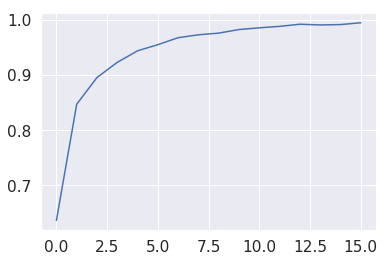

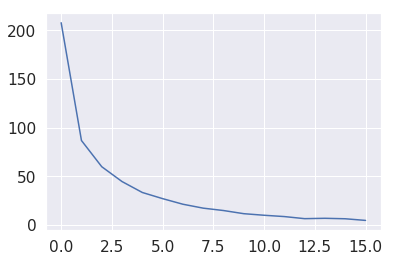

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023]


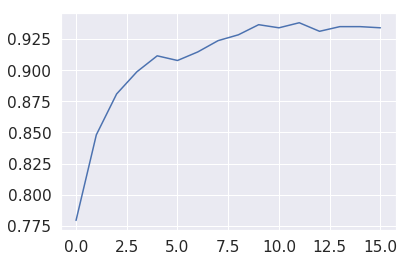

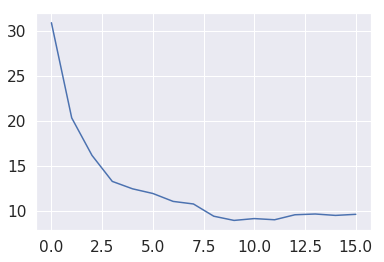


[16] accuracy: 0.934 loss: 9.625

runtime :  7206.906985759735
Train
[17, 00020] loss: 0.520 acc: 0.991
[17, 00040] loss: 0.908 acc: 0.994
[17, 00060] loss: 1.290 acc: 0.995
[17, 00080] loss: 1.774 acc: 0.994
[17, 00100] loss: 2.171 acc: 0.994
[17, 00120] loss: 2.631 acc: 0.994
[17, 00140] loss: 3.170 acc: 0.993
[17, 00160] loss: 3.631 acc: 0.994
[17, 00180] loss: 4.019 acc: 0.994
[17, 00200] loss: 4.363 acc: 0.994
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608, 6.199482839554548, 4.496239747852087, 4.3627841509878635]


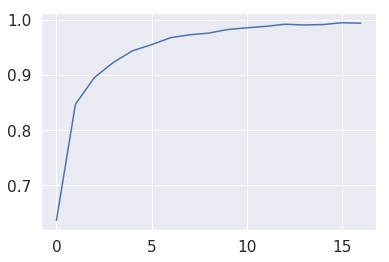

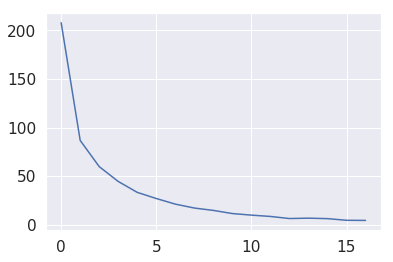

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648]


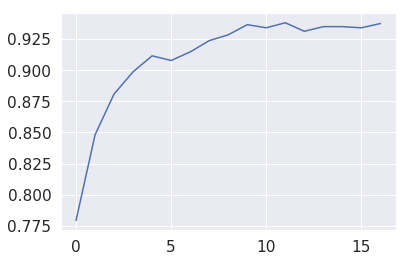

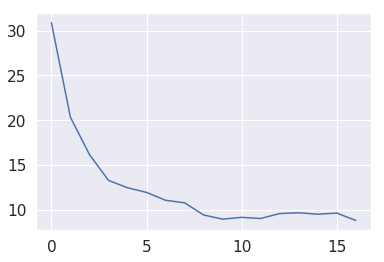


[17] accuracy: 0.938 loss: 8.808

runtime :  7721.861231088638
Train
[18, 00020] loss: 0.532 acc: 0.993
[18, 00040] loss: 0.790 acc: 0.996
[18, 00060] loss: 1.133 acc: 0.996
[18, 00080] loss: 1.519 acc: 0.996
[18, 00100] loss: 1.895 acc: 0.996
[18, 00120] loss: 2.233 acc: 0.996
[18, 00140] loss: 2.680 acc: 0.996
[18, 00160] loss: 2.984 acc: 0.997
[18, 00180] loss: 3.526 acc: 0.996
[18, 00200] loss: 3.988 acc: 0.996
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608, 6.199482839554548, 4.496239747852087, 4.3627841509878635, 3.98822320997715]


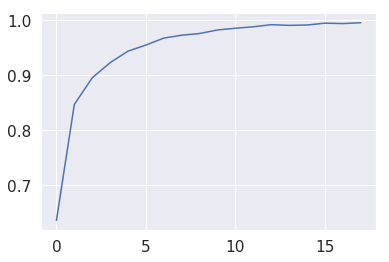

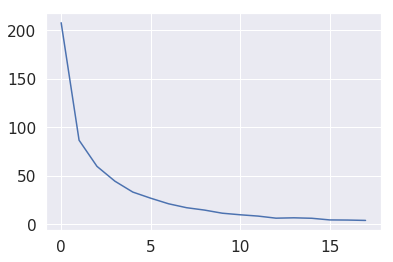

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358]


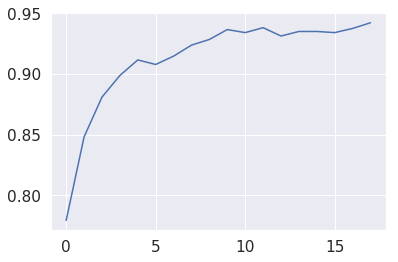

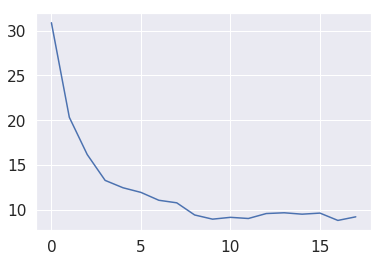


[18] accuracy: 0.942 loss: 9.210

runtime :  8233.153216600418
Train
[19, 00020] loss: 0.248 acc: 0.998
[19, 00040] loss: 0.518 acc: 0.998
[19, 00060] loss: 0.826 acc: 0.997
[19, 00080] loss: 1.108 acc: 0.997
[19, 00100] loss: 1.434 acc: 0.998
[19, 00120] loss: 1.857 acc: 0.997
[19, 00140] loss: 2.158 acc: 0.997
[19, 00160] loss: 2.500 acc: 0.997
[19, 00180] loss: 2.963 acc: 0.996
[19, 00200] loss: 3.346 acc: 0.996
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608, 6.199482839554548, 4.496239747852087, 4.3627841509878635, 3.98822320997715

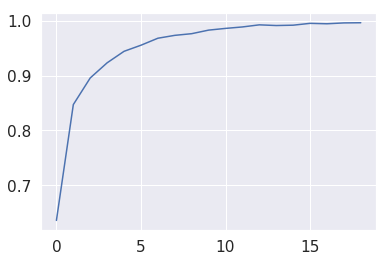

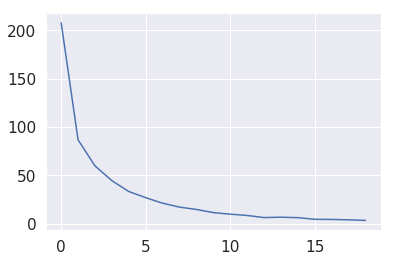

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682]


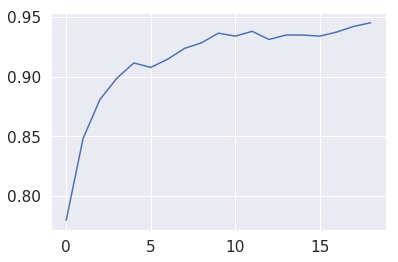

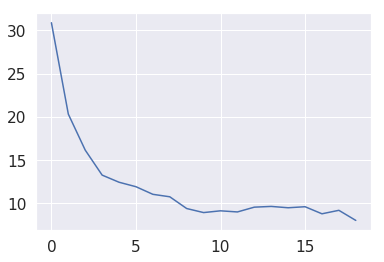


[19] accuracy: 0.945 loss: 8.044

runtime :  8745.906707048416
Train
[20, 00020] loss: 0.348 acc: 0.995
[20, 00040] loss: 0.682 acc: 0.996
[20, 00060] loss: 1.038 acc: 0.996
[20, 00080] loss: 1.401 acc: 0.996
[20, 00100] loss: 1.683 acc: 0.997
[20, 00120] loss: 2.053 acc: 0.996
[20, 00140] loss: 2.312 acc: 0.996
[20, 00160] loss: 2.576 acc: 0.997
[20, 00180] loss: 2.832 acc: 0.997
[20, 00200] loss: 3.126 acc: 0.996
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608, 6.199482839554548, 4.496239747852087, 4.3627841509878635, 3.9

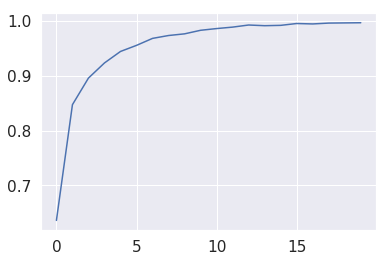

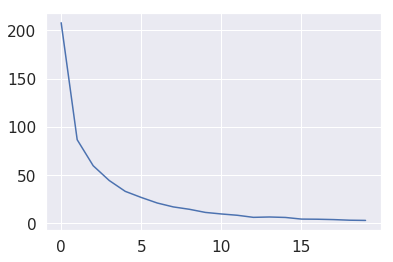

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267]


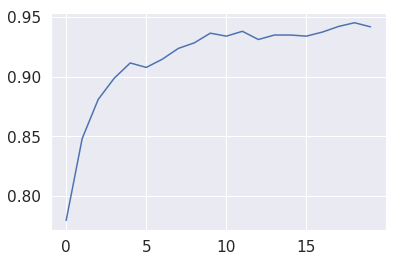

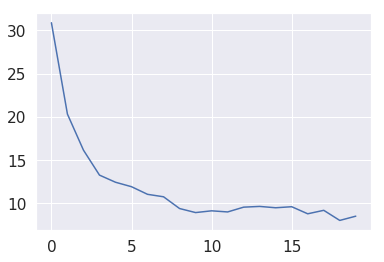


[20] accuracy: 0.942 loss: 8.534

runtime :  9257.656912088394
Train
[21, 00020] loss: 0.207 acc: 0.999
[21, 00040] loss: 0.411 acc: 0.999
[21, 00060] loss: 0.594 acc: 0.999
[21, 00080] loss: 0.800 acc: 0.999
[21, 00100] loss: 1.074 acc: 0.999
[21, 00120] loss: 1.465 acc: 0.998
[21, 00140] loss: 1.701 acc: 0.998
[21, 00160] loss: 1.900 acc: 0.998
[21, 00180] loss: 2.189 acc: 0.998
[21, 00200] loss: 2.466 acc: 0.998
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608, 6.199482839554548, 4.496239747852087, 4.36278415

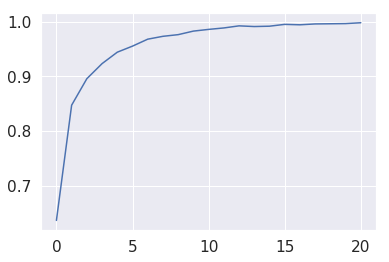

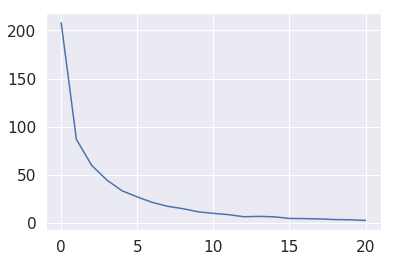

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332]


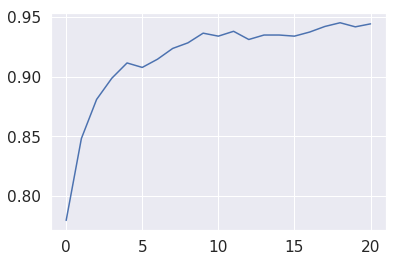

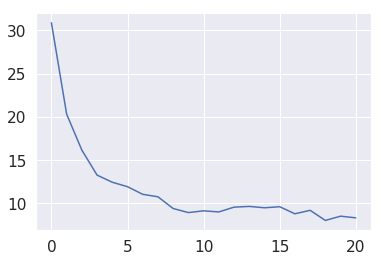


[21] accuracy: 0.944 loss: 8.342

runtime :  9770.851908922195
Train
[22, 00020] loss: 0.229 acc: 0.998
[22, 00040] loss: 0.459 acc: 0.998
[22, 00060] loss: 0.685 acc: 0.998
[22, 00080] loss: 0.845 acc: 0.998
[22, 00100] loss: 1.109 acc: 0.998
[22, 00120] loss: 1.519 acc: 0.997
[22, 00140] loss: 1.809 acc: 0.997
[22, 00160] loss: 2.084 acc: 0.997
[22, 00180] loss: 2.308 acc: 0.997
[22, 00200] loss: 2.572 acc: 0.997
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608, 6.199482839554548, 4.496239747852087

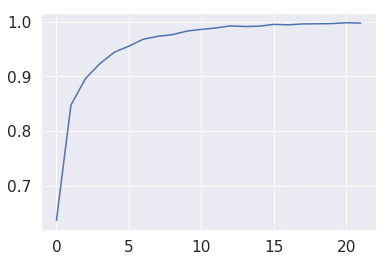

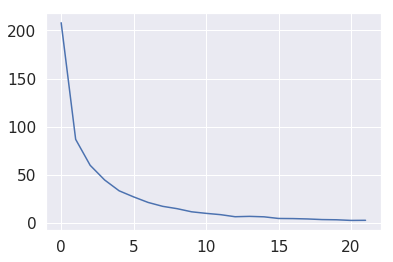

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519]


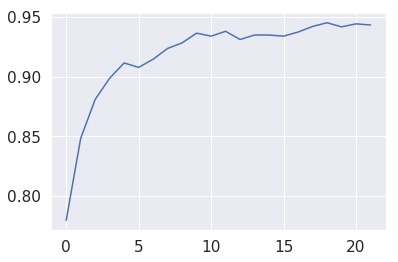

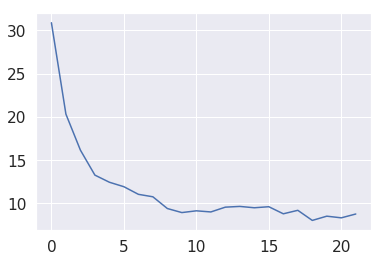


[22] accuracy: 0.943 loss: 8.785

runtime :  10281.718912601471
Train
[23, 00020] loss: 0.280 acc: 0.998
[23, 00040] loss: 0.510 acc: 0.998
[23, 00060] loss: 0.698 acc: 0.998
[23, 00080] loss: 0.969 acc: 0.998
[23, 00100] loss: 1.263 acc: 0.997
[23, 00120] loss: 1.448 acc: 0.998
[23, 00140] loss: 1.661 acc: 0.998
[23, 00160] loss: 1.983 acc: 0.997
[23, 00180] loss: 2.187 acc: 0.997
[23, 00200] loss: 2.448 acc: 0.997
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608, 6.199482839554548, 4.49

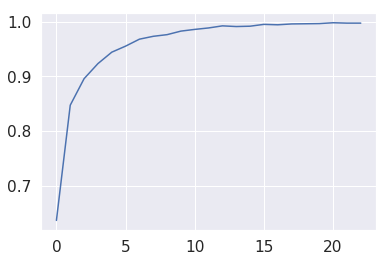

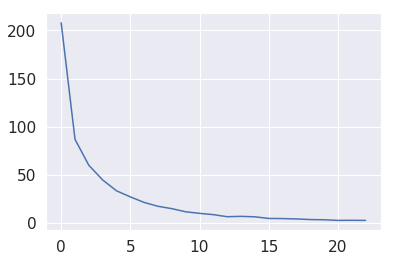

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933]


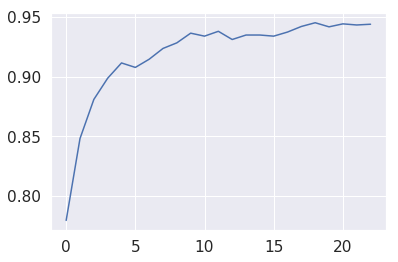

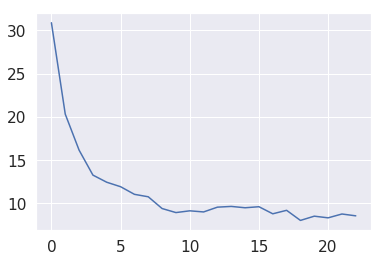


[23] accuracy: 0.944 loss: 8.572

runtime :  10793.474617004395
Train
[24, 00020] loss: 0.261 acc: 0.995
[24, 00040] loss: 0.408 acc: 0.997
[24, 00060] loss: 0.546 acc: 0.998
[24, 00080] loss: 0.752 acc: 0.998
[24, 00100] loss: 0.940 acc: 0.998
[24, 00120] loss: 1.107 acc: 0.998
[24, 00140] loss: 1.459 acc: 0.998
[24, 00160] loss: 1.656 acc: 0.998
[24, 00180] loss: 1.891 acc: 0.998
[24, 00200] loss: 2.033 acc: 0.998
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608, 6.19948283

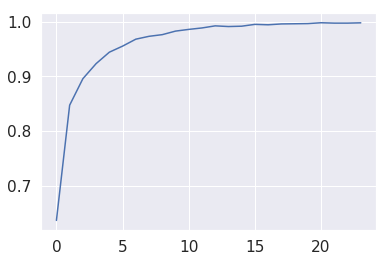

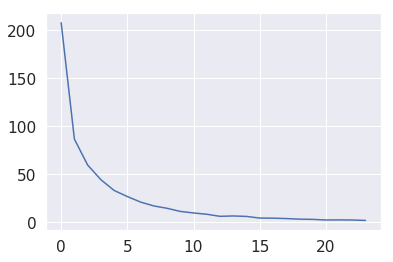

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253]


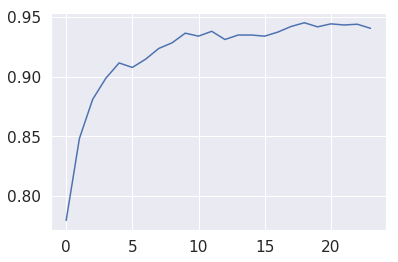

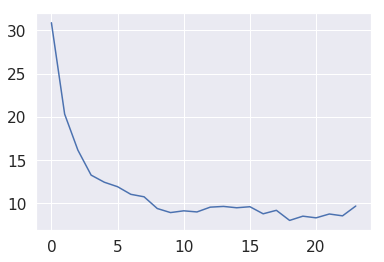


[24] accuracy: 0.941 loss: 9.706

runtime :  11306.006576776505
Train
[25, 00020] loss: 0.242 acc: 0.997
[25, 00040] loss: 0.470 acc: 0.997
[25, 00060] loss: 0.778 acc: 0.997
[25, 00080] loss: 1.007 acc: 0.997
[25, 00100] loss: 1.248 acc: 0.997
[25, 00120] loss: 1.517 acc: 0.997
[25, 00140] loss: 1.661 acc: 0.998
[25, 00160] loss: 1.879 acc: 0.998
[25, 00180] loss: 2.097 acc: 0.998
[25, 00200] loss: 2.270 acc: 0.998
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.677077442407608,

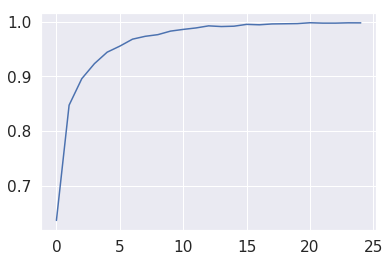

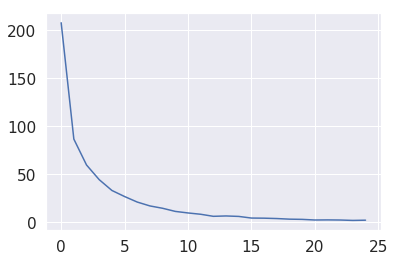

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411]


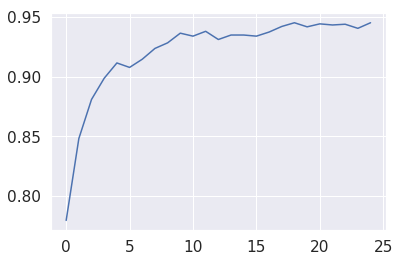

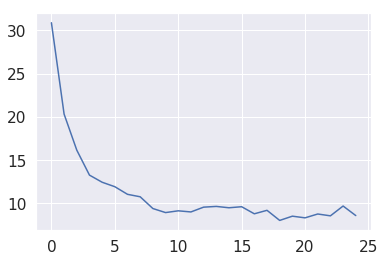


[25] accuracy: 0.945 loss: 8.603

runtime :  11821.112682819366
Train
[26, 00020] loss: 0.141 acc: 1.000
[26, 00040] loss: 0.345 acc: 0.999
[26, 00060] loss: 0.441 acc: 0.999
[26, 00080] loss: 0.639 acc: 0.999
[26, 00100] loss: 0.835 acc: 0.999
[26, 00120] loss: 0.981 acc: 0.999
[26, 00140] loss: 1.117 acc: 0.999
[26, 00160] loss: 1.235 acc: 0.999
[26, 00180] loss: 1.415 acc: 0.999
[26, 00200] loss: 1.574 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261215, 6.67707

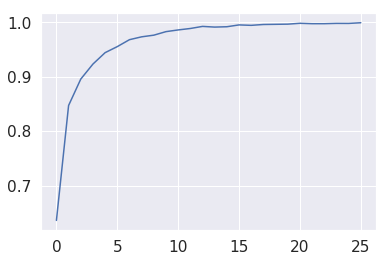

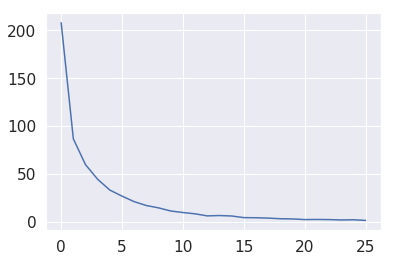

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137]


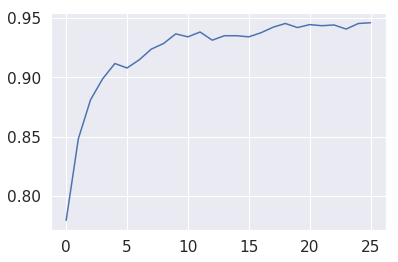

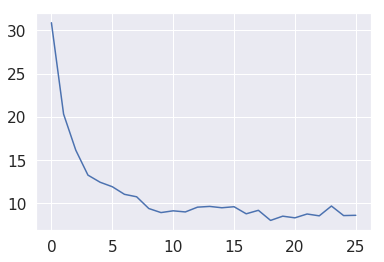


[26] accuracy: 0.946 loss: 8.634

runtime :  12332.666340112686
Train
[27, 00020] loss: 0.164 acc: 0.998
[27, 00040] loss: 0.324 acc: 0.998
[27, 00060] loss: 0.439 acc: 0.999
[27, 00080] loss: 0.681 acc: 0.998
[27, 00100] loss: 0.843 acc: 0.998
[27, 00120] loss: 1.131 acc: 0.998
[27, 00140] loss: 1.366 acc: 0.998
[27, 00160] loss: 1.711 acc: 0.997
[27, 00180] loss: 1.830 acc: 0.998
[27, 00200] loss: 2.113 acc: 0.997
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6.303443521261

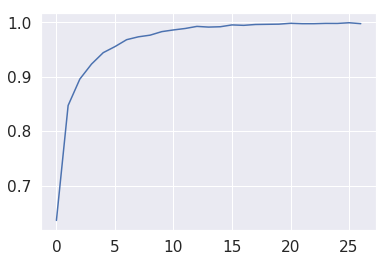

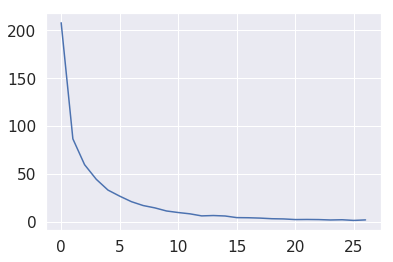

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298]


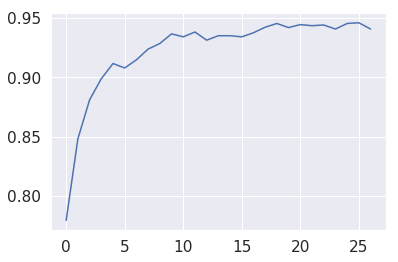

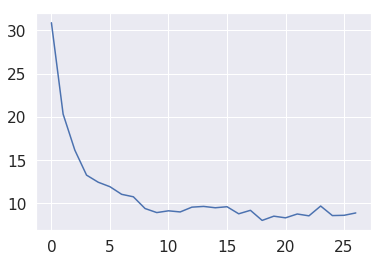


[27] accuracy: 0.941 loss: 8.907

runtime :  12844.877339601517
Train
[28, 00020] loss: 0.202 acc: 0.998
[28, 00040] loss: 0.374 acc: 0.999
[28, 00060] loss: 0.526 acc: 0.998
[28, 00080] loss: 0.837 acc: 0.998
[28, 00100] loss: 1.112 acc: 0.998
[28, 00120] loss: 1.332 acc: 0.998
[28, 00140] loss: 1.553 acc: 0.997
[28, 00160] loss: 1.701 acc: 0.997
[28, 00180] loss: 1.889 acc: 0.998
[28, 00200] loss: 2.063 acc: 0.998
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091408729553, 6

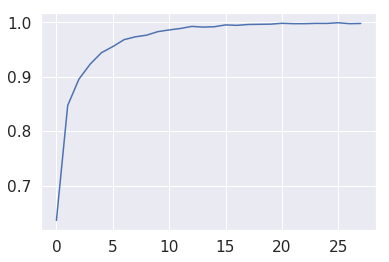

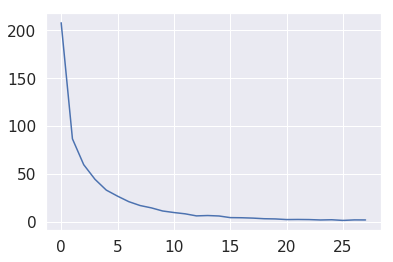

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713]


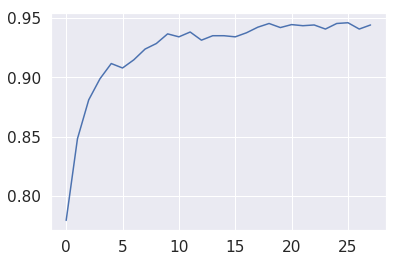

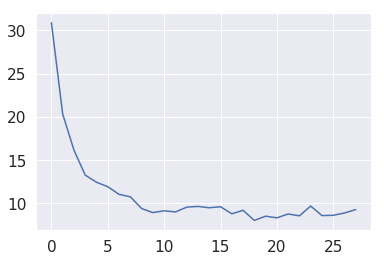


[28] accuracy: 0.944 loss: 9.298

runtime :  13359.711874008179
Train
[29, 00020] loss: 0.132 acc: 0.999
[29, 00040] loss: 0.241 acc: 0.999
[29, 00060] loss: 0.368 acc: 0.999
[29, 00080] loss: 0.508 acc: 0.999
[29, 00100] loss: 0.633 acc: 0.999
[29, 00120] loss: 0.808 acc: 0.999
[29, 00140] loss: 0.941 acc: 0.999
[29, 00160] loss: 1.107 acc: 0.999
[29, 00180] loss: 1.314 acc: 0.999
[29, 00200] loss: 1.516 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.808302950114012, 8.451091

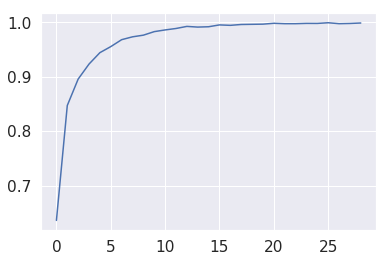

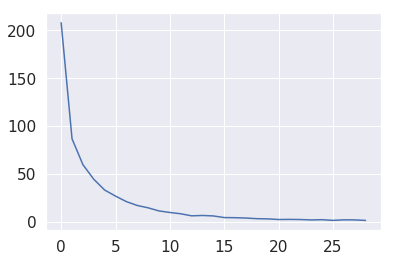

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763]


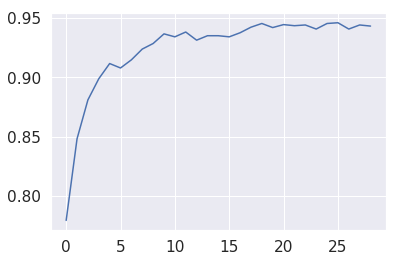

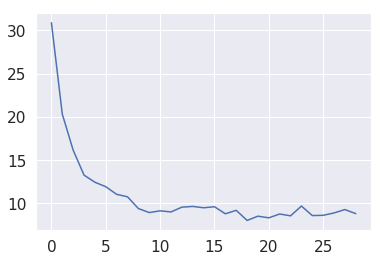


[29] accuracy: 0.943 loss: 8.825

runtime :  13873.112984418869
Train
[30, 00020] loss: 0.167 acc: 0.998
[30, 00040] loss: 0.331 acc: 0.999
[30, 00060] loss: 0.465 acc: 0.999
[30, 00080] loss: 0.607 acc: 0.999
[30, 00100] loss: 0.779 acc: 0.999
[30, 00120] loss: 0.959 acc: 0.999
[30, 00140] loss: 1.133 acc: 0.999
[30, 00160] loss: 1.320 acc: 0.999
[30, 00180] loss: 1.426 acc: 0.999
[30, 00200] loss: 1.597 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.8083029501140

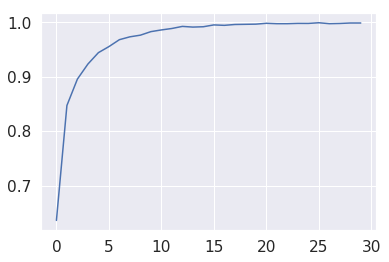

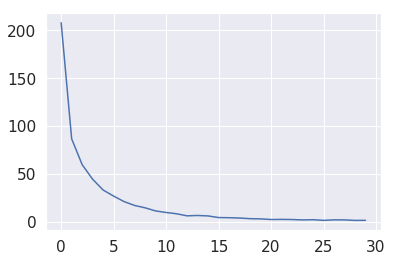

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402]


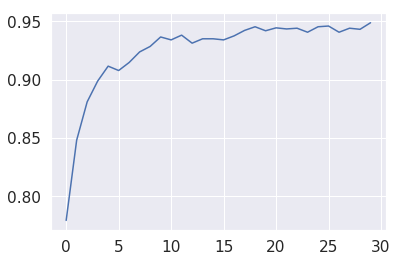

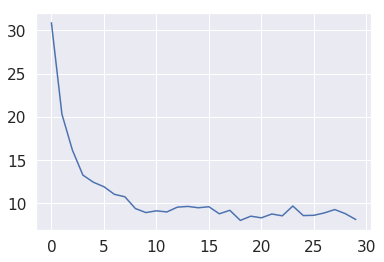


[30] accuracy: 0.949 loss: 8.147

runtime :  14389.879787683487
Train
[31, 00020] loss: 0.184 acc: 0.997
[31, 00040] loss: 0.303 acc: 0.998
[31, 00060] loss: 0.457 acc: 0.998
[31, 00080] loss: 0.560 acc: 0.999
[31, 00100] loss: 0.779 acc: 0.998
[31, 00120] loss: 0.948 acc: 0.998
[31, 00140] loss: 1.065 acc: 0.998
[31, 00160] loss: 1.203 acc: 0.998
[31, 00180] loss: 1.352 acc: 0.998
[31, 00200] loss: 1.451 acc: 0.998
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277535081, 9.8

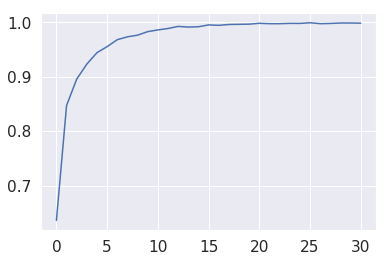

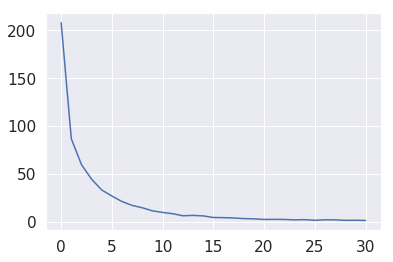

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402, 8.309256948530674]


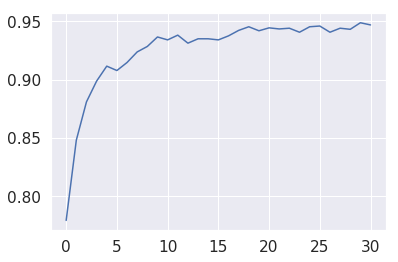

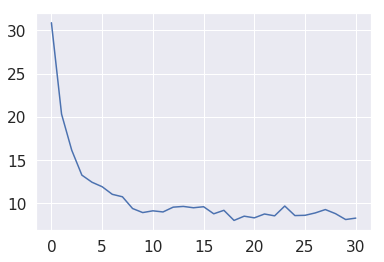


[31] accuracy: 0.947 loss: 8.309

runtime :  14908.535324811935
Train
[32, 00020] loss: 0.150 acc: 0.998
[32, 00040] loss: 0.235 acc: 0.998
[32, 00060] loss: 0.347 acc: 0.999
[32, 00080] loss: 0.441 acc: 0.999
[32, 00100] loss: 0.545 acc: 0.999
[32, 00120] loss: 0.697 acc: 0.999
[32, 00140] loss: 0.810 acc: 0.999
[32, 00160] loss: 0.886 acc: 0.999
[32, 00180] loss: 1.097 acc: 0.999
[32, 00200] loss: 1.213 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11.424199277

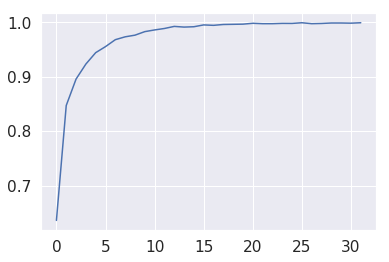

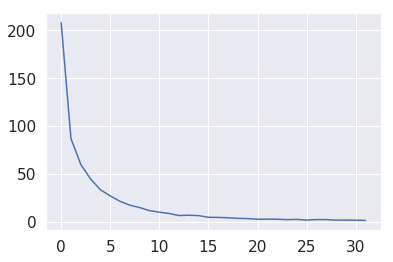

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402, 8.309256948530674, 8.208120346069336]


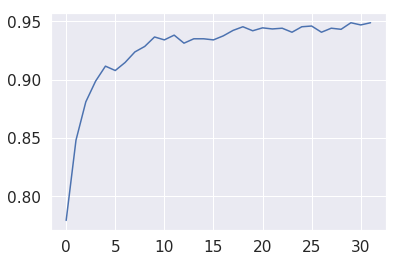

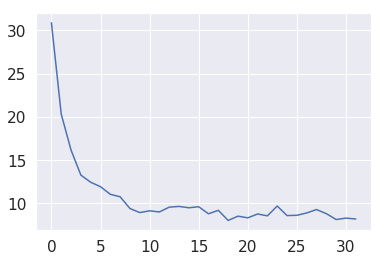


[32] accuracy: 0.949 loss: 8.208

runtime :  15421.97125673294
Train
[33, 00020] loss: 0.068 acc: 1.000
[33, 00040] loss: 0.160 acc: 1.000
[33, 00060] loss: 0.277 acc: 0.999
[33, 00080] loss: 0.373 acc: 0.999
[33, 00100] loss: 0.581 acc: 0.999
[33, 00120] loss: 0.754 acc: 0.999
[33, 00140] loss: 0.906 acc: 0.999
[33, 00160] loss: 1.016 acc: 0.999
[33, 00180] loss: 1.094 acc: 0.999
[33, 00200] loss: 1.170 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.671370573341846, 11

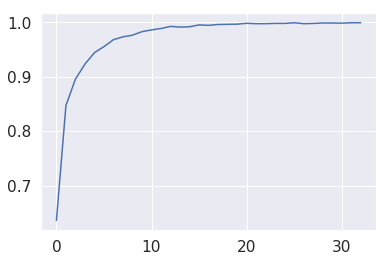

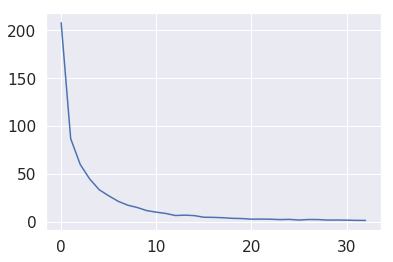

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402, 8.309256948530674, 8.208120346069336, 8.690396845340729]


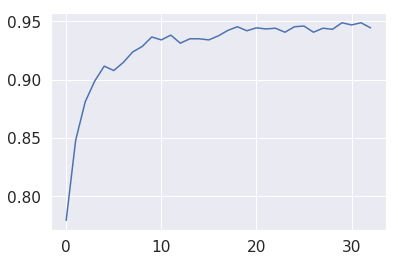

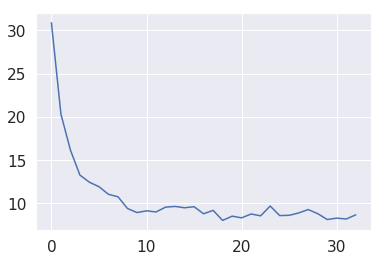


[33] accuracy: 0.944 loss: 8.690

runtime :  15935.106982946396
Train
[34, 00020] loss: 0.065 acc: 1.000
[34, 00040] loss: 0.185 acc: 1.000
[34, 00060] loss: 0.304 acc: 0.999
[34, 00080] loss: 0.381 acc: 0.999
[34, 00100] loss: 0.528 acc: 0.999
[34, 00120] loss: 0.701 acc: 0.999
[34, 00140] loss: 0.834 acc: 0.999
[34, 00160] loss: 0.913 acc: 0.999
[34, 00180] loss: 1.006 acc: 0.999
[34, 00200] loss: 1.116 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727, 14.6713705

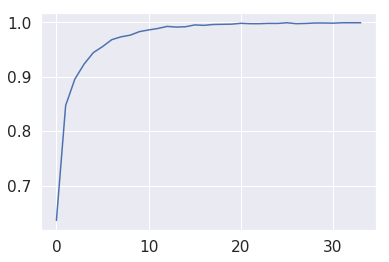

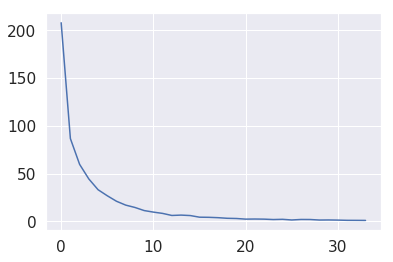

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402, 8.309256948530674, 8.208120346069336, 8.690396845340729, 8.837059151381

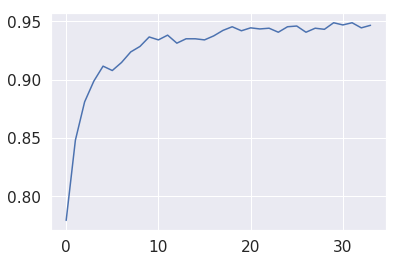

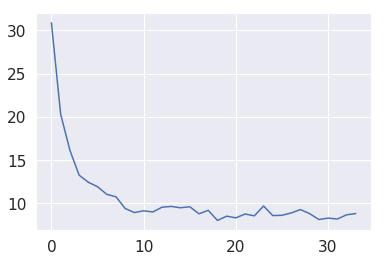


[34] accuracy: 0.947 loss: 8.837

runtime :  16450.325425624847
Train
[35, 00020] loss: 0.156 acc: 0.998
[35, 00040] loss: 0.275 acc: 0.998
[35, 00060] loss: 0.383 acc: 0.999
[35, 00080] loss: 0.480 acc: 0.999
[35, 00100] loss: 0.693 acc: 0.999
[35, 00120] loss: 0.784 acc: 0.999
[35, 00140] loss: 0.939 acc: 0.999
[35, 00160] loss: 1.082 acc: 0.999
[35, 00180] loss: 1.192 acc: 0.999
[35, 00200] loss: 1.338 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.11941296234727

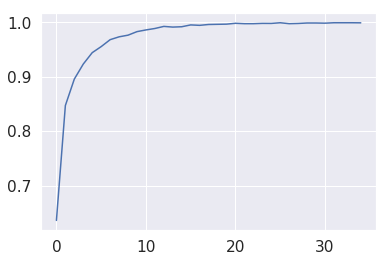

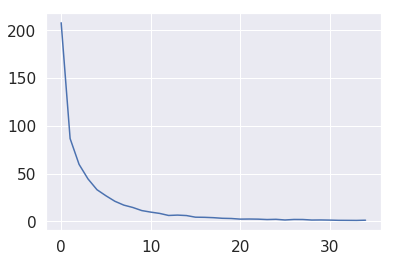

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402, 8.309256948530674, 8.208120346069336, 8.690396845340729, 8.83

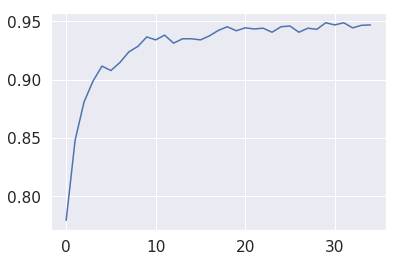

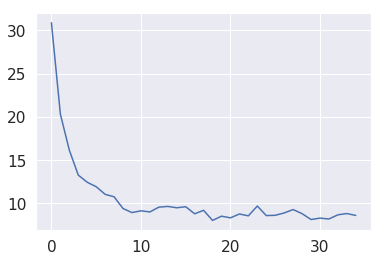


[35] accuracy: 0.947 loss: 8.619

runtime :  16968.925513744354
Train
[36, 00020] loss: 0.114 acc: 0.999
[36, 00040] loss: 0.206 acc: 1.000
[36, 00060] loss: 0.319 acc: 0.999
[36, 00080] loss: 0.436 acc: 0.999
[36, 00100] loss: 0.495 acc: 0.999
[36, 00120] loss: 0.593 acc: 0.999
[36, 00140] loss: 0.752 acc: 0.999
[36, 00160] loss: 0.840 acc: 0.999
[36, 00180] loss: 0.941 acc: 0.999
[36, 00200] loss: 1.043 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455056548, 17.1

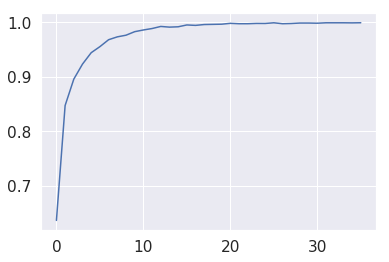

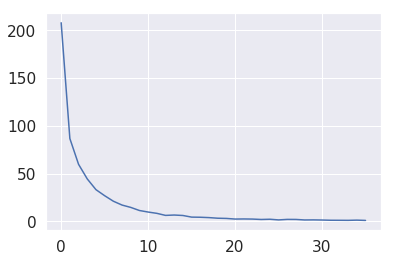

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402, 8.309256948530674, 8.208120346069336, 8.6903968453

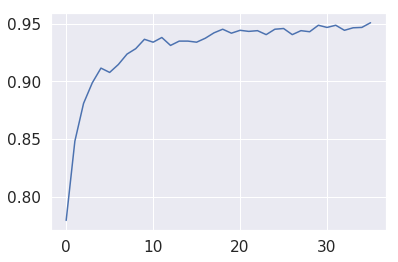

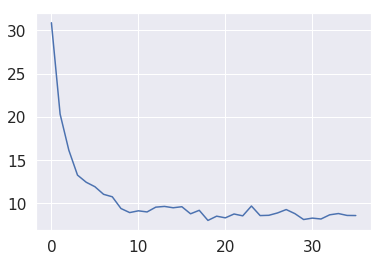


[36] accuracy: 0.951 loss: 8.607

runtime :  17485.450526237488
Train
[37, 00020] loss: 0.073 acc: 1.000
[37, 00040] loss: 0.205 acc: 1.000
[37, 00060] loss: 0.330 acc: 0.999
[37, 00080] loss: 0.397 acc: 0.999
[37, 00100] loss: 0.509 acc: 0.999
[37, 00120] loss: 0.589 acc: 0.999
[37, 00140] loss: 0.711 acc: 0.999
[37, 00160] loss: 0.828 acc: 0.999
[37, 00180] loss: 0.939 acc: 0.999
[37, 00200] loss: 1.028 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492, 21.15223455

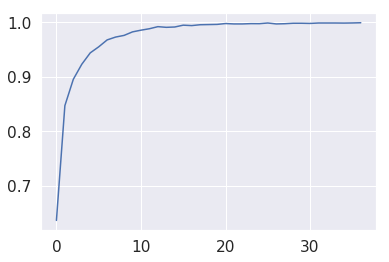

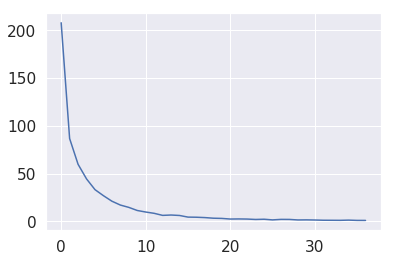

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402, 8.309256948530674, 8.208120346069336, 8

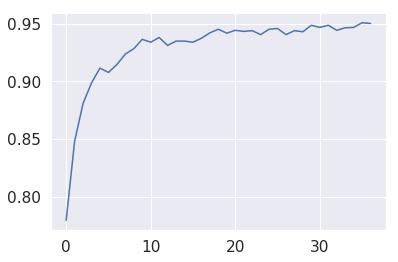

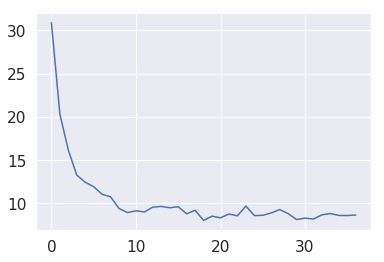


[37] accuracy: 0.950 loss: 8.664

runtime :  17997.86373615265
Train
[38, 00020] loss: 0.085 acc: 0.999
[38, 00040] loss: 0.207 acc: 0.999
[38, 00060] loss: 0.297 acc: 0.999
[38, 00080] loss: 0.403 acc: 0.999
[38, 00100] loss: 0.506 acc: 0.999
[38, 00120] loss: 0.590 acc: 0.999
[38, 00140] loss: 0.703 acc: 0.999
[38, 00160] loss: 0.782 acc: 0.999
[38, 00180] loss: 0.881 acc: 0.999
[38, 00200] loss: 0.962 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.91346212476492,

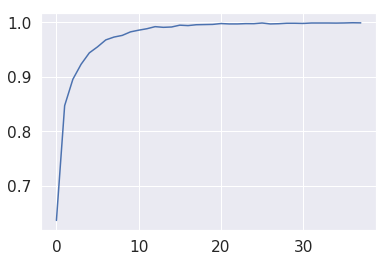

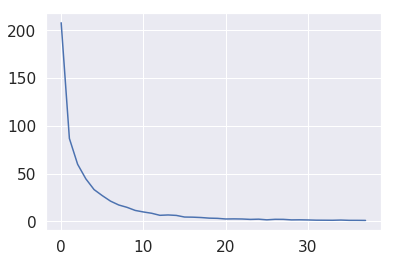

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402, 8.309256948530674, 8.2081203

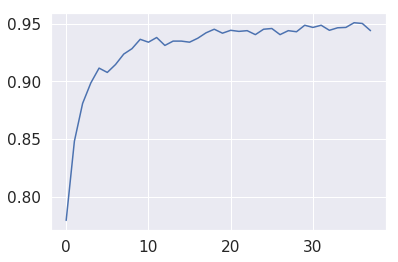

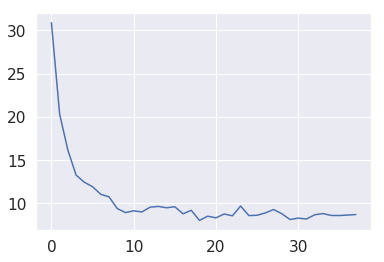


[38] accuracy: 0.944 loss: 8.722

runtime :  18511.751312494278
Train
[39, 00020] loss: 0.071 acc: 1.000
[39, 00040] loss: 0.127 acc: 1.000
[39, 00060] loss: 0.173 acc: 1.000
[39, 00080] loss: 0.339 acc: 0.999
[39, 00100] loss: 0.407 acc: 1.000
[39, 00120] loss: 0.480 acc: 1.000
[39, 00140] loss: 0.549 acc: 1.000
[39, 00160] loss: 0.665 acc: 1.000
[39, 00180] loss: 0.784 acc: 1.000
[39, 00200] loss: 0.917 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.24632368609309, 26.9

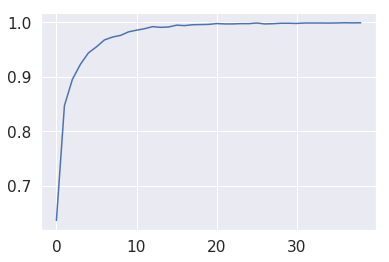

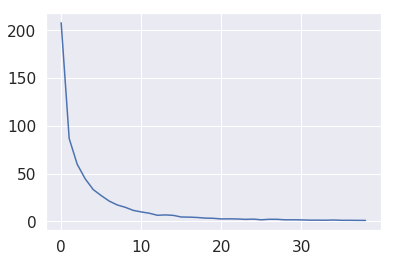

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402, 8.309256948530674,

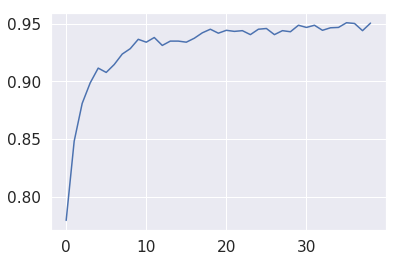

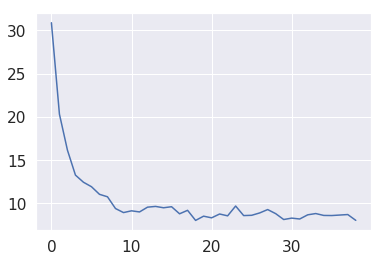


[39] accuracy: 0.951 loss: 8.050

runtime :  19026.703766822815
Train
[40, 00020] loss: 0.067 acc: 1.000
[40, 00040] loss: 0.133 acc: 1.000
[40, 00060] loss: 0.230 acc: 0.999
[40, 00080] loss: 0.303 acc: 0.999
[40, 00100] loss: 0.360 acc: 0.999
[40, 00120] loss: 0.415 acc: 0.999
[40, 00140] loss: 0.580 acc: 0.999
[40, 00160] loss: 0.637 acc: 0.999
[40, 00180] loss: 0.750 acc: 0.999
[40, 00200] loss: 0.847 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744, 33.2463236

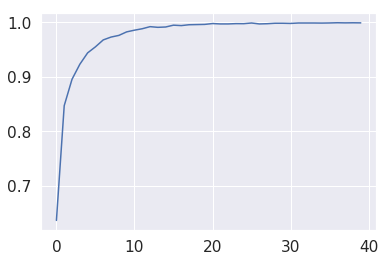

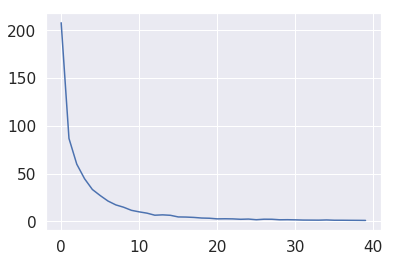

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402, 8.309256

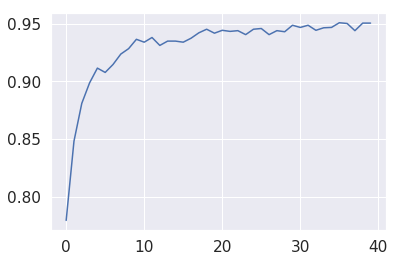

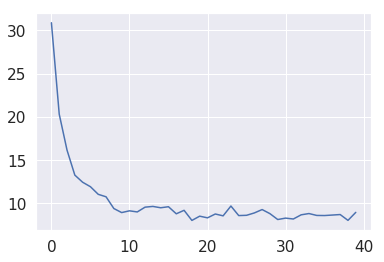


[40] accuracy: 0.951 loss: 8.975

runtime :  19545.739646434784
Train
[41, 00020] loss: 0.068 acc: 1.000
[41, 00040] loss: 0.217 acc: 0.999
[41, 00060] loss: 0.281 acc: 0.999
[41, 00080] loss: 0.332 acc: 0.999
[41, 00100] loss: 0.403 acc: 1.000
[41, 00120] loss: 0.492 acc: 1.000
[41, 00140] loss: 0.579 acc: 1.000
[41, 00160] loss: 0.657 acc: 1.000
[41, 00180] loss: 0.698 acc: 1.000
[41, 00200] loss: 0.759 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.49107860028744,

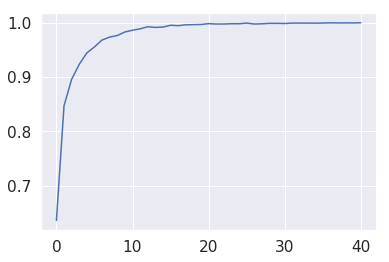

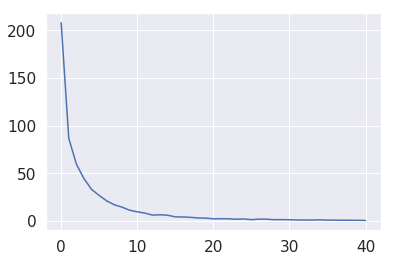

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725849032402,

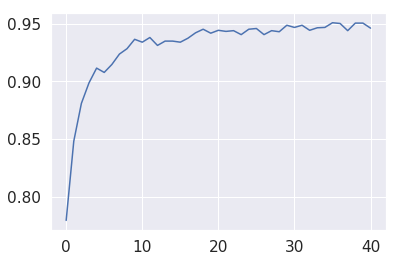

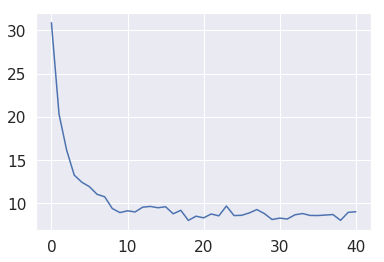


[41] accuracy: 0.946 loss: 9.046

runtime :  20063.842787504196
Train
[42, 00020] loss: 0.076 acc: 0.999
[42, 00040] loss: 0.165 acc: 0.999
[42, 00060] loss: 0.219 acc: 0.999
[42, 00080] loss: 0.287 acc: 1.000
[42, 00100] loss: 0.347 acc: 1.000
[42, 00120] loss: 0.440 acc: 0.999
[42, 00140] loss: 0.509 acc: 1.000
[42, 00160] loss: 0.607 acc: 0.999
[42, 00180] loss: 0.702 acc: 0.999
[42, 00200] loss: 0.788 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125]
[207.97899934649467, 86.74440161883831, 59.77049741894007, 44.491

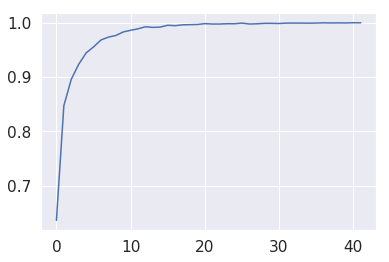

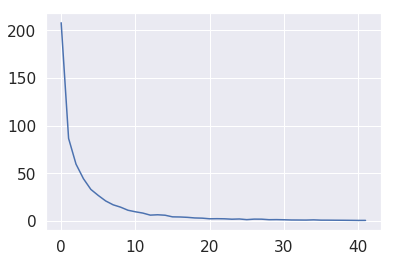

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.825042575597763, 8.14725

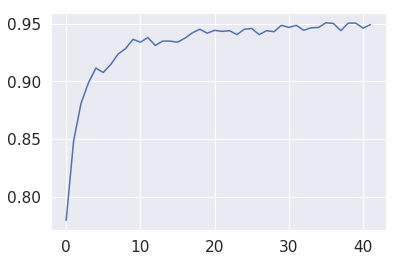

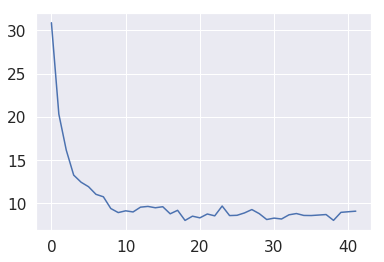


[42] accuracy: 0.949 loss: 9.112

runtime :  20577.929115772247
Train
[43, 00020] loss: 0.107 acc: 0.998
[43, 00040] loss: 0.174 acc: 0.999
[43, 00060] loss: 0.249 acc: 0.999
[43, 00080] loss: 0.351 acc: 0.999
[43, 00100] loss: 0.417 acc: 0.999
[43, 00120] loss: 0.525 acc: 0.999
[43, 00140] loss: 0.653 acc: 0.999
[43, 00160] loss: 0.729 acc: 0.999
[43, 00180] loss: 0.793 acc: 0.999
[43, 00200] loss: 0.886 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375]
[207.97899934649467, 86.74440161883831, 59.770497418

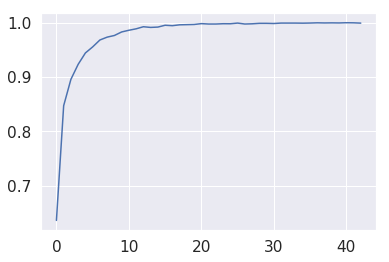

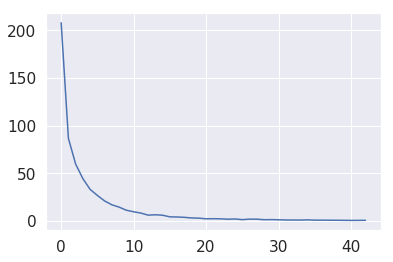

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.8250425755977

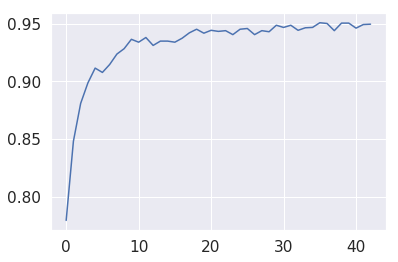

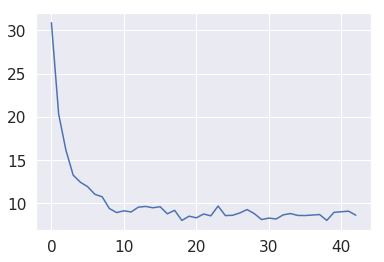


[43] accuracy: 0.950 loss: 8.645

runtime :  21094.89761185646
Train
[44, 00020] loss: 0.084 acc: 0.999
[44, 00040] loss: 0.139 acc: 1.000
[44, 00060] loss: 0.238 acc: 0.999
[44, 00080] loss: 0.293 acc: 0.999
[44, 00100] loss: 0.358 acc: 1.000
[44, 00120] loss: 0.432 acc: 0.999
[44, 00140] loss: 0.502 acc: 0.999
[44, 00160] loss: 0.573 acc: 0.999
[44, 00180] loss: 0.632 acc: 0.999
[44, 00200] loss: 0.714 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125]
[207.97899934649467, 86.74440161883831, 

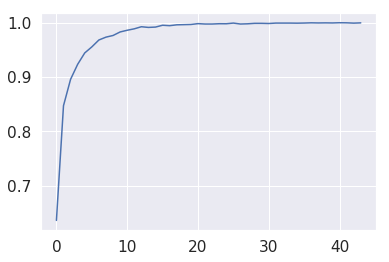

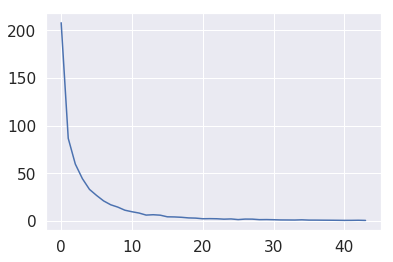

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.298274599015713, 8.82

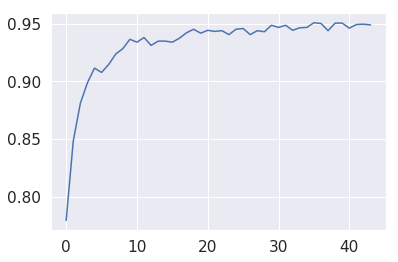

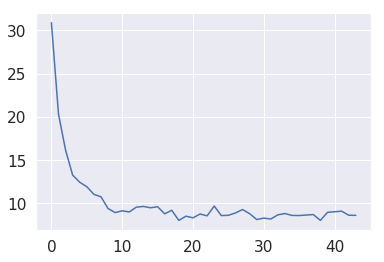


[44] accuracy: 0.949 loss: 8.627

runtime :  21608.6697473526
Train
[45, 00020] loss: 0.041 acc: 1.000
[45, 00040] loss: 0.097 acc: 1.000
[45, 00060] loss: 0.170 acc: 1.000
[45, 00080] loss: 0.229 acc: 1.000
[45, 00100] loss: 0.289 acc: 1.000
[45, 00120] loss: 0.339 acc: 1.000
[45, 00140] loss: 0.451 acc: 1.000
[45, 00160] loss: 0.543 acc: 1.000
[45, 00180] loss: 0.665 acc: 0.999
[45, 00200] loss: 0.700 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125]
[207.97899934649467, 86.7444

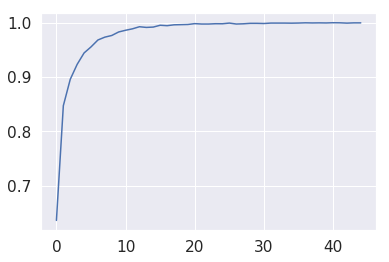

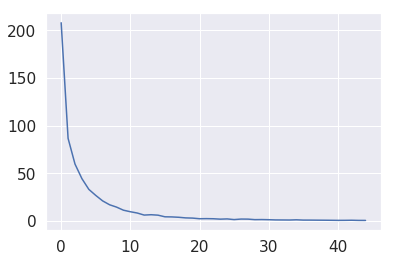

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.29827459901

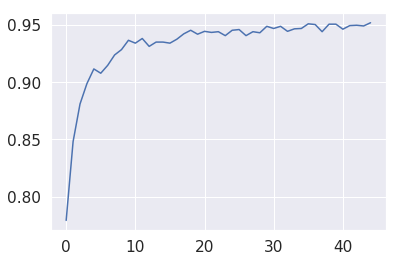

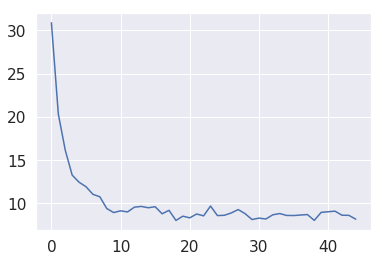


[45] accuracy: 0.952 loss: 8.189

runtime :  22125.317696094513
Train
[46, 00020] loss: 0.061 acc: 1.000
[46, 00040] loss: 0.114 acc: 1.000
[46, 00060] loss: 0.294 acc: 0.999
[46, 00080] loss: 0.347 acc: 0.999
[46, 00100] loss: 0.478 acc: 0.999
[46, 00120] loss: 0.577 acc: 0.999
[46, 00140] loss: 0.640 acc: 0.999
[46, 00160] loss: 0.764 acc: 0.999
[46, 00180] loss: 0.848 acc: 0.999
[46, 00200] loss: 0.906 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625]
[207.97899934

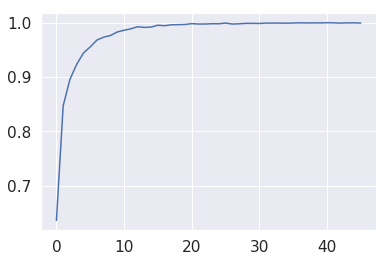

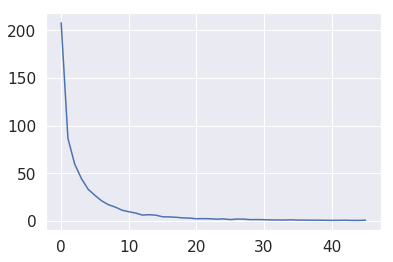

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.907031074166298, 9.

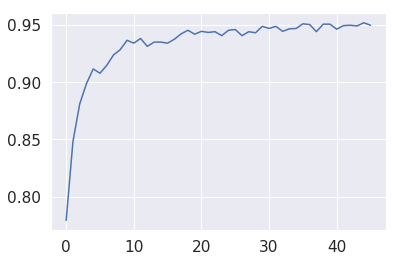

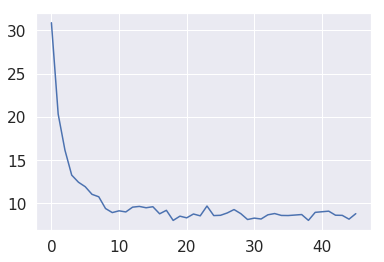


[46] accuracy: 0.950 loss: 8.824

runtime :  22639.132793426514
Train
[47, 00020] loss: 0.045 acc: 1.000
[47, 00040] loss: 0.120 acc: 1.000
[47, 00060] loss: 0.172 acc: 1.000
[47, 00080] loss: 0.250 acc: 1.000
[47, 00100] loss: 0.339 acc: 1.000
[47, 00120] loss: 0.440 acc: 0.999
[47, 00140] loss: 0.524 acc: 0.999
[47, 00160] loss: 0.589 acc: 1.000
[47, 00180] loss: 0.682 acc: 0.999
[47, 00200] loss: 0.732 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125]


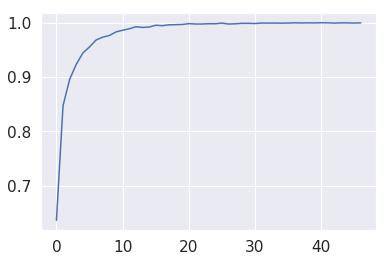

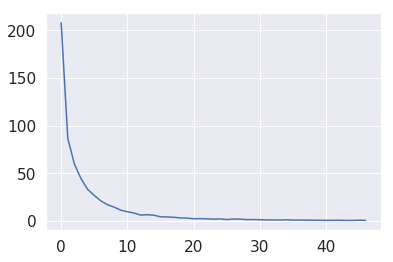

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.90703107

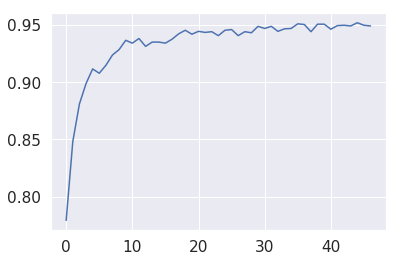

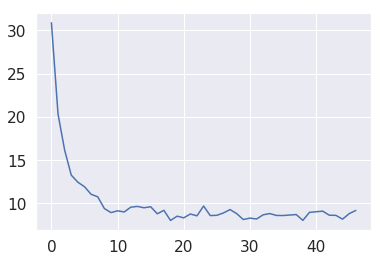


[47] accuracy: 0.949 loss: 9.195

runtime :  23154.226120710373
Train
[48, 00020] loss: 0.030 acc: 1.000
[48, 00040] loss: 0.098 acc: 1.000
[48, 00060] loss: 0.157 acc: 1.000
[48, 00080] loss: 0.248 acc: 1.000
[48, 00100] loss: 0.339 acc: 1.000
[48, 00120] loss: 0.409 acc: 1.000
[48, 00140] loss: 0.508 acc: 0.999
[48, 00160] loss: 0.572 acc: 1.000
[48, 00180] loss: 0.630 acc: 1.000
[48, 00200] loss: 0.673 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

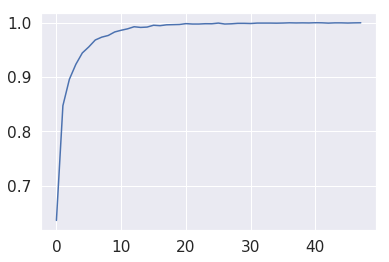

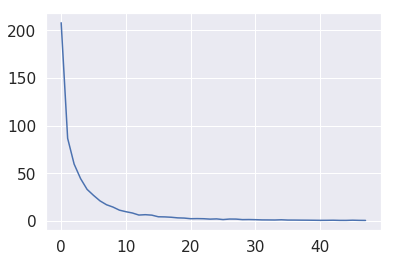

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.634046897292137, 8.

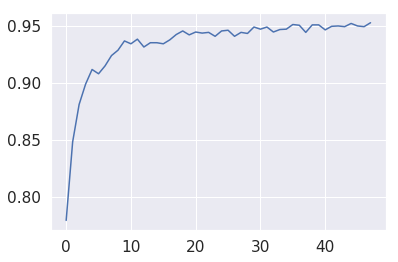

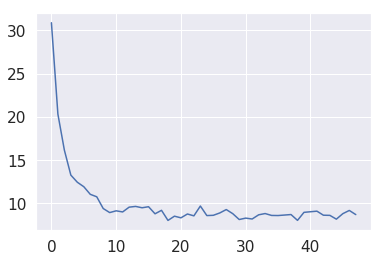


[48] accuracy: 0.953 loss: 8.716

runtime :  23669.07922768593
Train
[49, 00020] loss: 0.037 acc: 1.000
[49, 00040] loss: 0.111 acc: 0.999
[49, 00060] loss: 0.224 acc: 0.999
[49, 00080] loss: 0.316 acc: 0.999
[49, 00100] loss: 0.417 acc: 0.999
[49, 00120] loss: 0.625 acc: 0.999
[49, 00140] loss: 0.728 acc: 0.999
[49, 00160] loss: 0.774 acc: 0.999
[49, 00180] loss: 0.887 acc: 0.999
[49, 00200] loss: 0.998 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

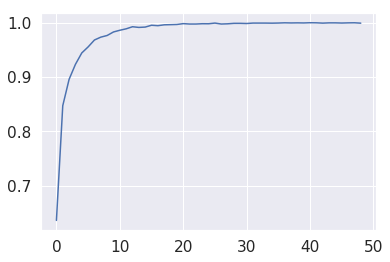

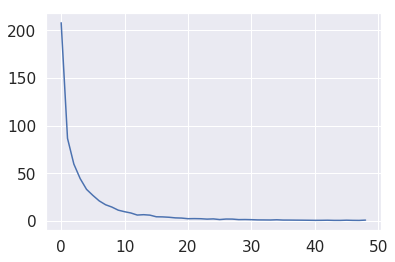

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.63404689729

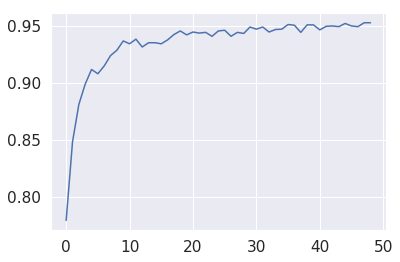

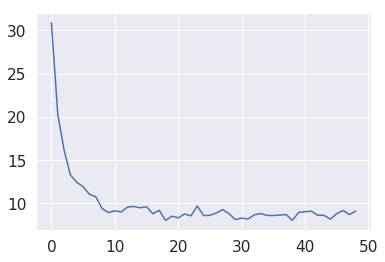


[49] accuracy: 0.953 loss: 9.110

runtime :  24185.510974168777
Train
[50, 00020] loss: 0.074 acc: 0.999
[50, 00040] loss: 0.140 acc: 0.999
[50, 00060] loss: 0.206 acc: 0.999
[50, 00080] loss: 0.283 acc: 0.999
[50, 00100] loss: 0.327 acc: 1.000
[50, 00120] loss: 0.376 acc: 0.999
[50, 00140] loss: 0.420 acc: 1.000
[50, 00160] loss: 0.561 acc: 0.999
[50, 00180] loss: 0.632 acc: 0.999
[50, 00200] loss: 0.730 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

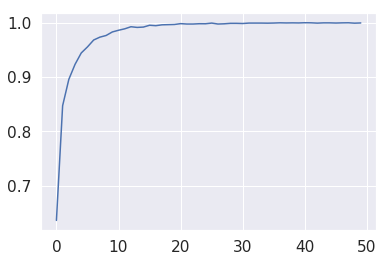

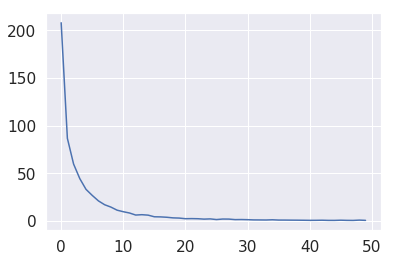

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.603093385696411, 8.

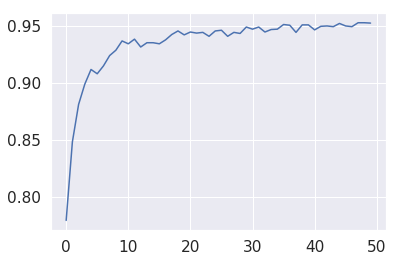

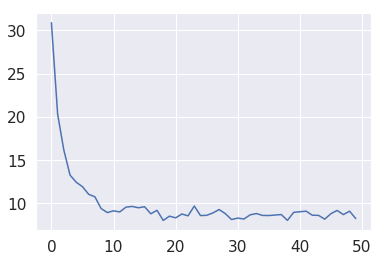


[50] accuracy: 0.952 loss: 8.252

runtime :  24702.212911128998
Train
[51, 00020] loss: 0.077 acc: 0.999
[51, 00040] loss: 0.131 acc: 0.999
[51, 00060] loss: 0.285 acc: 0.999
[51, 00080] loss: 0.341 acc: 0.999
[51, 00100] loss: 0.428 acc: 0.999
[51, 00120] loss: 0.484 acc: 0.999
[51, 00140] loss: 0.633 acc: 0.999
[51, 00160] loss: 0.671 acc: 0.999
[51, 00180] loss: 0.749 acc: 0.999
[51, 00200] loss: 0.845 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

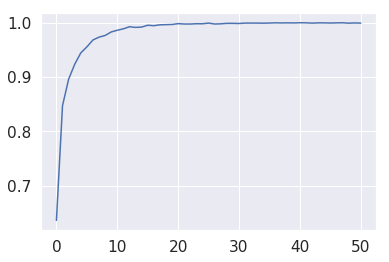

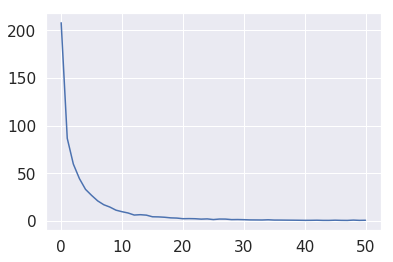

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253, 8.60309338

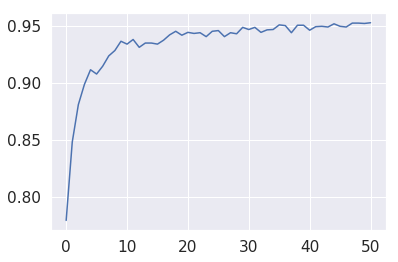

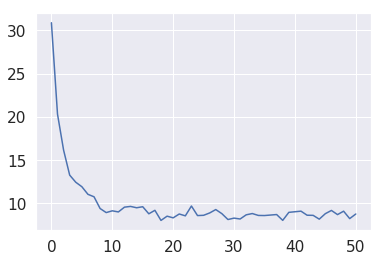


[51] accuracy: 0.953 loss: 8.783

runtime :  25217.040843725204
Train
[52, 00020] loss: 0.046 acc: 1.000
[52, 00040] loss: 0.126 acc: 1.000
[52, 00060] loss: 0.181 acc: 1.000
[52, 00080] loss: 0.234 acc: 1.000
[52, 00100] loss: 0.324 acc: 1.000
[52, 00120] loss: 0.363 acc: 1.000
[52, 00140] loss: 0.457 acc: 1.000
[52, 00160] loss: 0.519 acc: 1.000
[52, 00180] loss: 0.597 acc: 0.999
[52, 00200] loss: 0.618 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

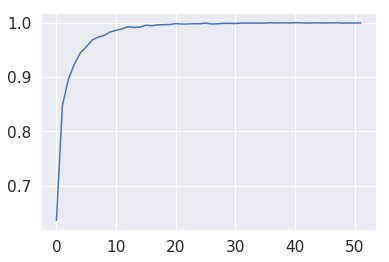

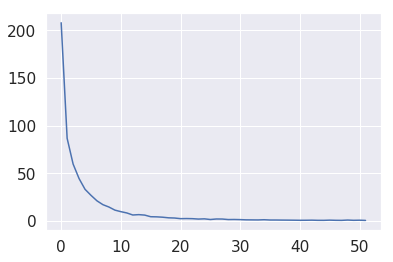

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.705517388880253,

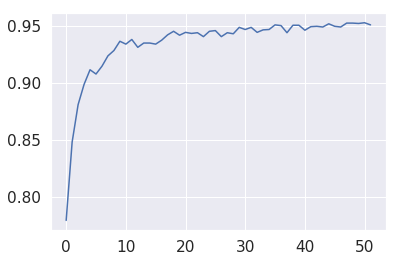

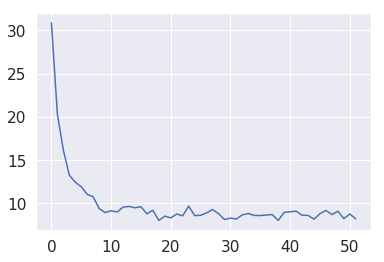


[52] accuracy: 0.951 loss: 8.229

runtime :  25731.508709430695
Train
[53, 00020] loss: 0.048 acc: 0.999
[53, 00040] loss: 0.118 acc: 0.999
[53, 00060] loss: 0.197 acc: 0.999
[53, 00080] loss: 0.244 acc: 0.999
[53, 00100] loss: 0.337 acc: 0.999
[53, 00120] loss: 0.400 acc: 0.999
[53, 00140] loss: 0.494 acc: 0.999
[53, 00160] loss: 0.550 acc: 0.999
[53, 00180] loss: 0.588 acc: 0.999
[53, 00200] loss: 0.758 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

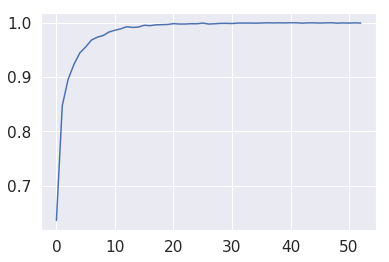

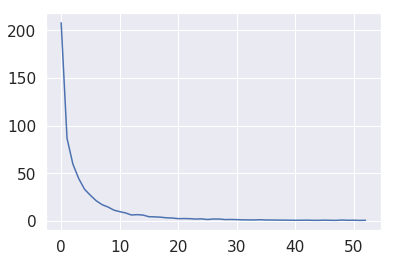

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 9.70551738

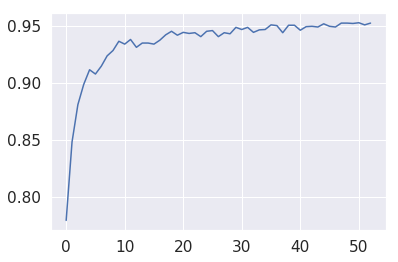

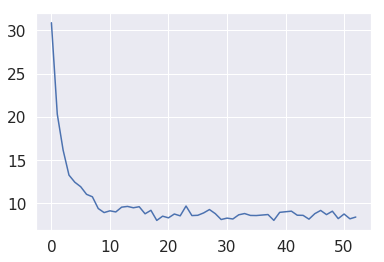


[53] accuracy: 0.953 loss: 8.434

runtime :  26247.062947273254
Train
[54, 00020] loss: 0.050 acc: 1.000
[54, 00040] loss: 0.147 acc: 0.999
[54, 00060] loss: 0.209 acc: 0.999
[54, 00080] loss: 0.290 acc: 0.999
[54, 00100] loss: 0.363 acc: 0.999
[54, 00120] loss: 0.417 acc: 0.999
[54, 00140] loss: 0.458 acc: 0.999
[54, 00160] loss: 0.501 acc: 0.999
[54, 00180] loss: 0.543 acc: 0.999
[54, 00200] loss: 0.590 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

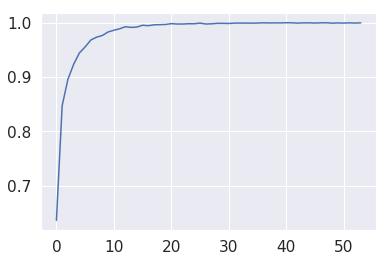

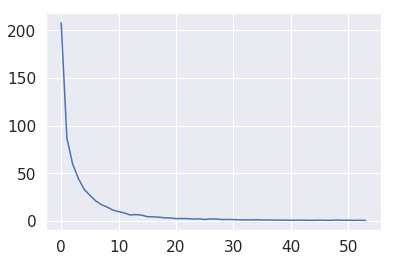

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.572325821965933, 

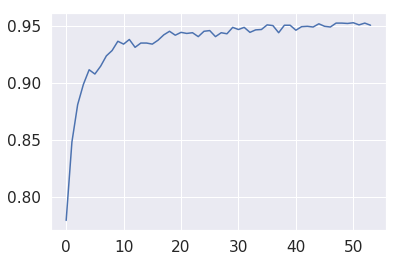

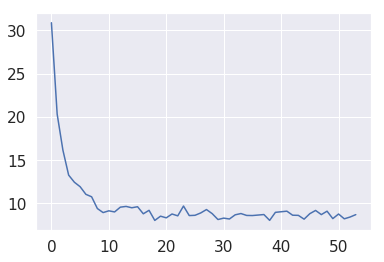


[54] accuracy: 0.951 loss: 8.712

runtime :  26764.168914079666
Train
[55, 00020] loss: 0.056 acc: 1.000
[55, 00040] loss: 0.101 acc: 1.000
[55, 00060] loss: 0.182 acc: 1.000
[55, 00080] loss: 0.225 acc: 1.000
[55, 00100] loss: 0.317 acc: 1.000
[55, 00120] loss: 0.355 acc: 1.000
[55, 00140] loss: 0.437 acc: 1.000
[55, 00160] loss: 0.489 acc: 1.000
[55, 00180] loss: 0.545 acc: 1.000
[55, 00200] loss: 0.658 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

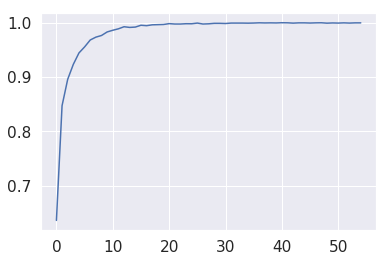

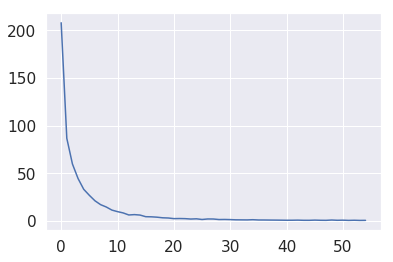

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 8.57232582

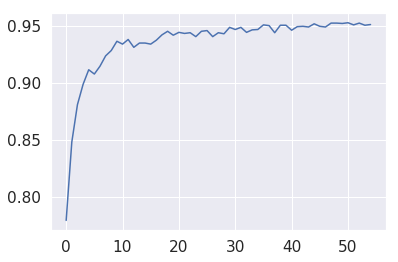

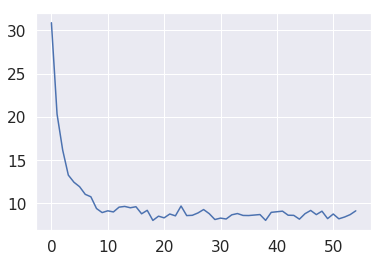


[55] accuracy: 0.951 loss: 9.152

runtime :  27285.534734725952
Train
[56, 00020] loss: 0.034 acc: 1.000
[56, 00040] loss: 0.086 acc: 1.000
[56, 00060] loss: 0.131 acc: 1.000
[56, 00080] loss: 0.155 acc: 1.000
[56, 00100] loss: 0.192 acc: 1.000
[56, 00120] loss: 0.236 acc: 1.000
[56, 00140] loss: 0.294 acc: 1.000
[56, 00160] loss: 0.397 acc: 1.000
[56, 00180] loss: 0.430 acc: 1.000
[56, 00200] loss: 0.451 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

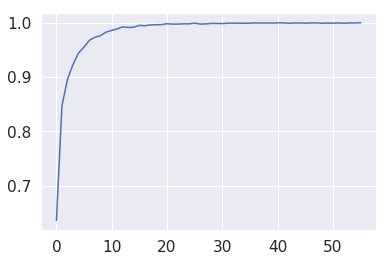

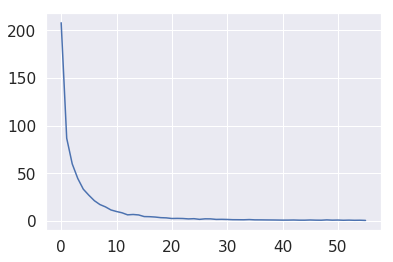

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851931035519, 

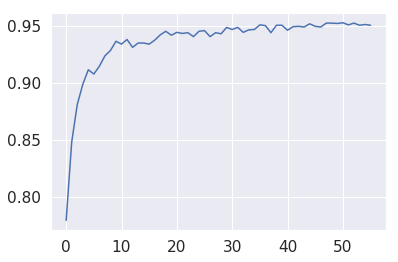

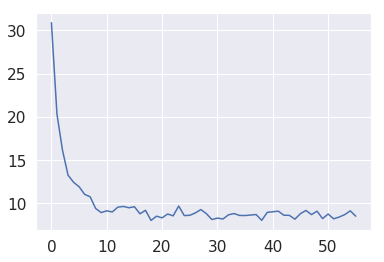


[56] accuracy: 0.951 loss: 8.529

runtime :  27802.973063468933
Train
[57, 00020] loss: 0.047 acc: 1.000
[57, 00040] loss: 0.080 acc: 1.000
[57, 00060] loss: 0.150 acc: 1.000
[57, 00080] loss: 0.226 acc: 1.000
[57, 00100] loss: 0.268 acc: 1.000
[57, 00120] loss: 0.309 acc: 1.000
[57, 00140] loss: 0.387 acc: 1.000
[57, 00160] loss: 0.435 acc: 1.000
[57, 00180] loss: 0.547 acc: 1.000
[57, 00200] loss: 0.584 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

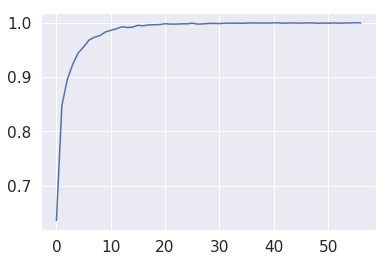

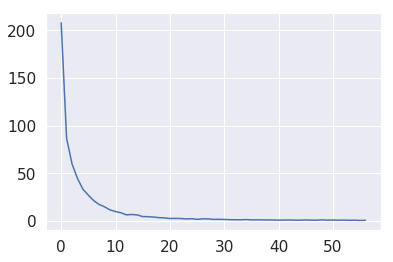

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341745600104332, 8.784851

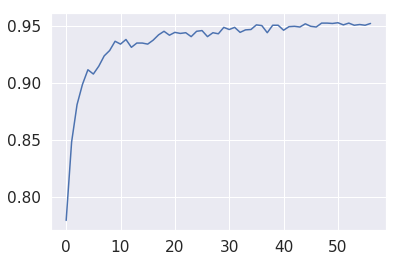

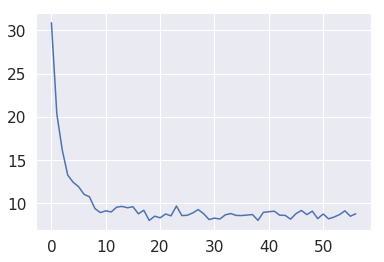


[57] accuracy: 0.952 loss: 8.813

runtime :  28318.94975423813
Train
[58, 00020] loss: 0.094 acc: 0.998
[58, 00040] loss: 0.137 acc: 0.999
[58, 00060] loss: 0.169 acc: 0.999
[58, 00080] loss: 0.195 acc: 0.999
[58, 00100] loss: 0.237 acc: 1.000
[58, 00120] loss: 0.295 acc: 1.000
[58, 00140] loss: 0.359 acc: 1.000
[58, 00160] loss: 0.408 acc: 1.000
[58, 00180] loss: 0.465 acc: 0.999
[58, 00200] loss: 0.510 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

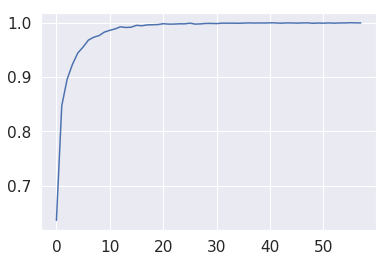

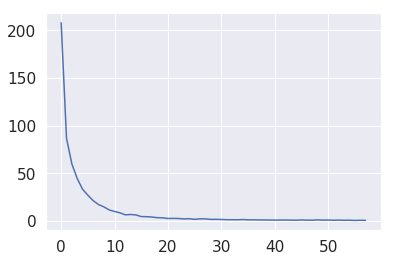

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.34174560010433

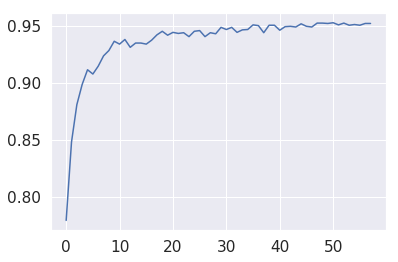

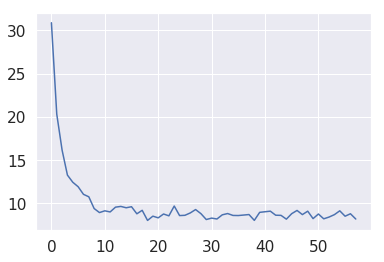


[58] accuracy: 0.952 loss: 8.205

runtime :  28833.397088766098
Train
[59, 00020] loss: 0.053 acc: 0.999
[59, 00040] loss: 0.102 acc: 1.000
[59, 00060] loss: 0.127 acc: 1.000
[59, 00080] loss: 0.169 acc: 1.000
[59, 00100] loss: 0.207 acc: 1.000
[59, 00120] loss: 0.272 acc: 0.999
[59, 00140] loss: 0.318 acc: 0.999
[59, 00160] loss: 0.410 acc: 0.999
[59, 00180] loss: 0.441 acc: 0.999
[59, 00200] loss: 0.521 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

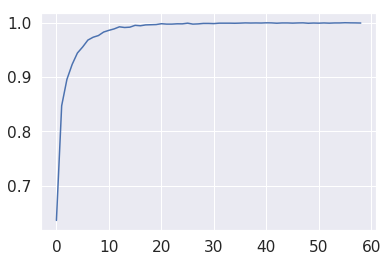

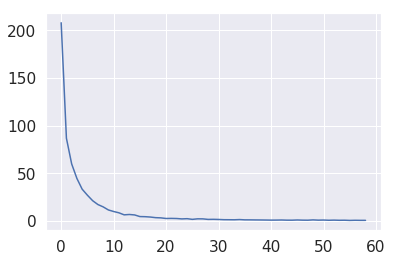

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903267, 8.341

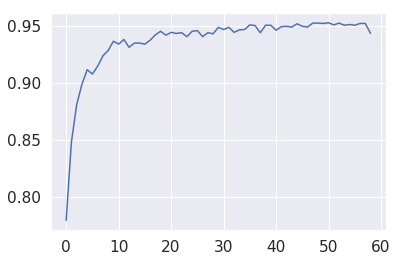

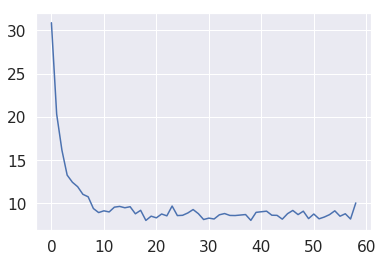


[59] accuracy: 0.943 loss: 10.063

runtime :  29350.077801465988
Train
[60, 00020] loss: 0.039 acc: 1.000
[60, 00040] loss: 0.115 acc: 1.000
[60, 00060] loss: 0.165 acc: 1.000
[60, 00080] loss: 0.211 acc: 1.000
[60, 00100] loss: 0.237 acc: 1.000
[60, 00120] loss: 0.280 acc: 1.000
[60, 00140] loss: 0.350 acc: 1.000
[60, 00160] loss: 0.396 acc: 1.000
[60, 00180] loss: 0.444 acc: 1.000
[60, 00200] loss: 0.486 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125,

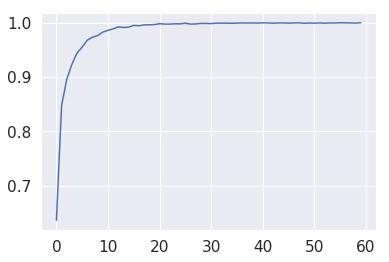

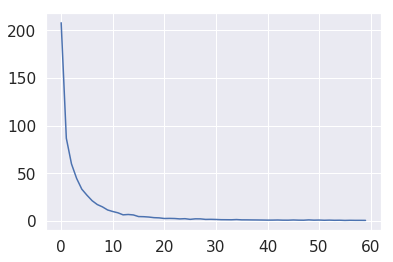

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.533834531903

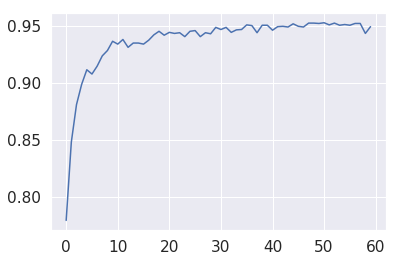

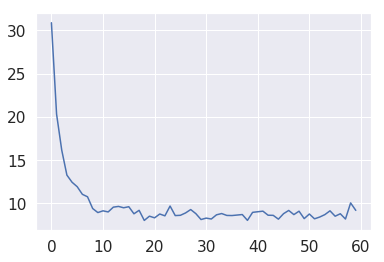


[60] accuracy: 0.949 loss: 9.204

runtime :  29867.602559566498
Train
[61, 00020] loss: 0.022 acc: 1.000
[61, 00040] loss: 0.077 acc: 1.000
[61, 00060] loss: 0.110 acc: 1.000
[61, 00080] loss: 0.190 acc: 1.000
[61, 00100] loss: 0.223 acc: 1.000
[61, 00120] loss: 0.279 acc: 1.000
[61, 00140] loss: 0.318 acc: 1.000
[61, 00160] loss: 0.345 acc: 1.000
[61, 00180] loss: 0.407 acc: 1.000
[61, 00200] loss: 0.448 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

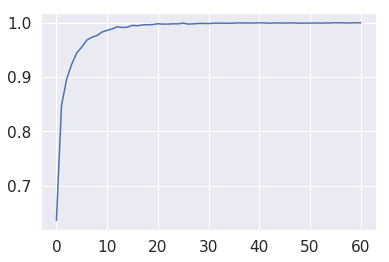

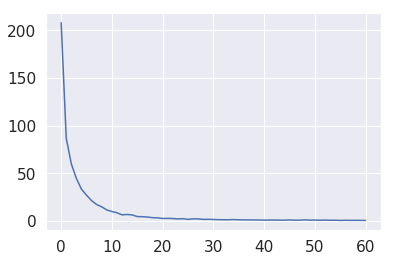

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015425682, 8.5

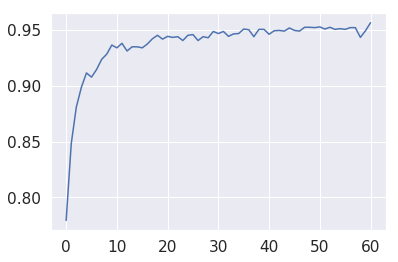

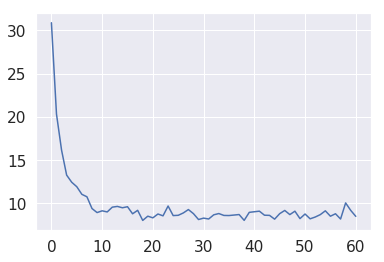


[61] accuracy: 0.957 loss: 8.512

runtime :  30384.176393270493
Train
[62, 00020] loss: 0.033 acc: 1.000
[62, 00040] loss: 0.072 acc: 1.000
[62, 00060] loss: 0.101 acc: 1.000
[62, 00080] loss: 0.131 acc: 1.000
[62, 00100] loss: 0.176 acc: 1.000
[62, 00120] loss: 0.225 acc: 1.000
[62, 00140] loss: 0.262 acc: 1.000
[62, 00160] loss: 0.320 acc: 1.000
[62, 00180] loss: 0.369 acc: 1.000
[62, 00200] loss: 0.421 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

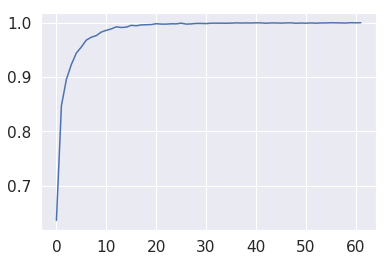

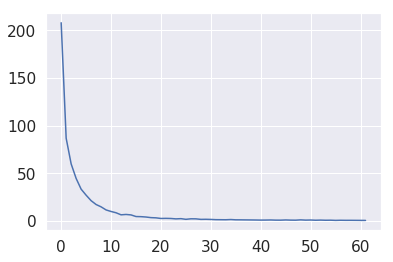

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 8.043825015

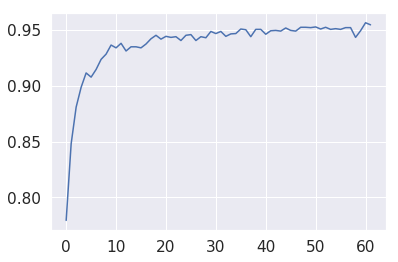

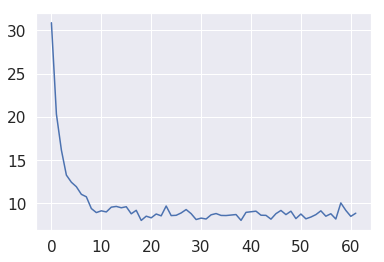


[62] accuracy: 0.955 loss: 8.878

runtime :  30901.230838775635
Train
[63, 00020] loss: 0.031 acc: 1.000
[63, 00040] loss: 0.086 acc: 1.000
[63, 00060] loss: 0.118 acc: 1.000
[63, 00080] loss: 0.208 acc: 1.000
[63, 00100] loss: 0.246 acc: 1.000
[63, 00120] loss: 0.277 acc: 1.000
[63, 00140] loss: 0.303 acc: 1.000
[63, 00160] loss: 0.326 acc: 1.000
[63, 00180] loss: 0.366 acc: 1.000
[63, 00200] loss: 0.419 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

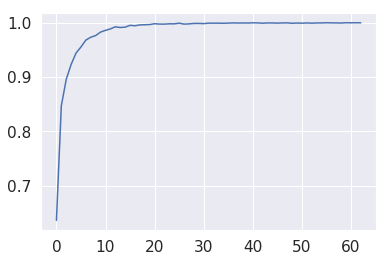

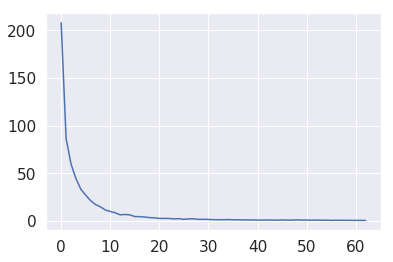

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204556584358, 

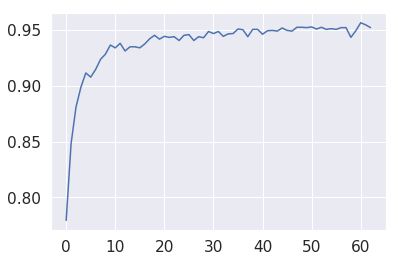

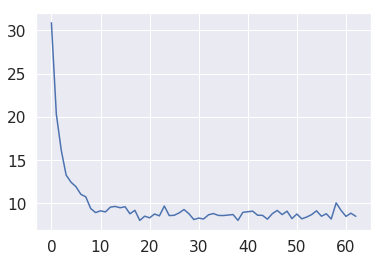


[63] accuracy: 0.952 loss: 8.519

runtime :  31418.54240298271
Train
[64, 00020] loss: 0.042 acc: 0.999
[64, 00040] loss: 0.075 acc: 1.000
[64, 00060] loss: 0.116 acc: 1.000
[64, 00080] loss: 0.167 acc: 1.000
[64, 00100] loss: 0.203 acc: 1.000
[64, 00120] loss: 0.259 acc: 0.999
[64, 00140] loss: 0.293 acc: 1.000
[64, 00160] loss: 0.351 acc: 0.999
[64, 00180] loss: 0.381 acc: 0.999
[64, 00200] loss: 0.434 acc: 0.999
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

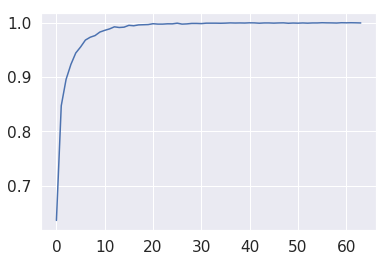

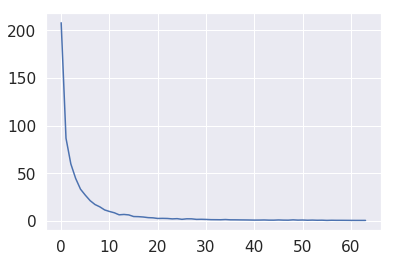

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648, 9.210204

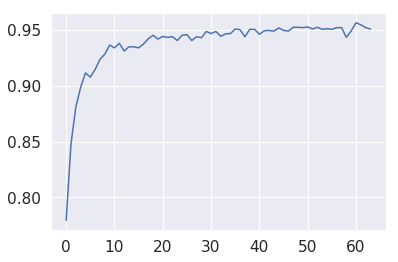

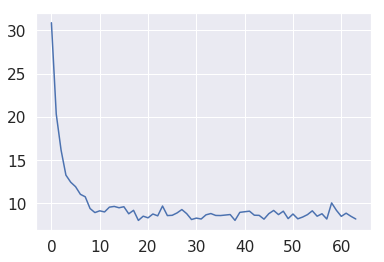


[64] accuracy: 0.951 loss: 8.207

runtime :  31936.00928759575
Train
[65, 00020] loss: 0.036 acc: 1.000
[65, 00040] loss: 0.068 acc: 1.000
[65, 00060] loss: 0.101 acc: 1.000
[65, 00080] loss: 0.163 acc: 1.000
[65, 00100] loss: 0.243 acc: 1.000
[65, 00120] loss: 0.289 acc: 1.000
[65, 00140] loss: 0.322 acc: 1.000
[65, 00160] loss: 0.353 acc: 1.000
[65, 00180] loss: 0.433 acc: 1.000
[65, 00200] loss: 0.469 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

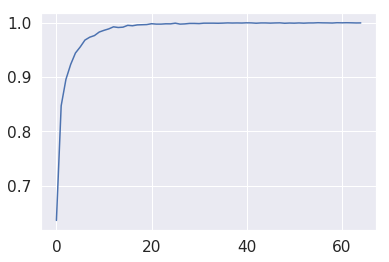

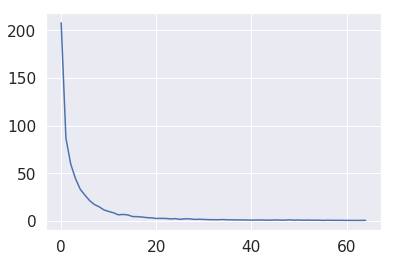

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.808413870632648,

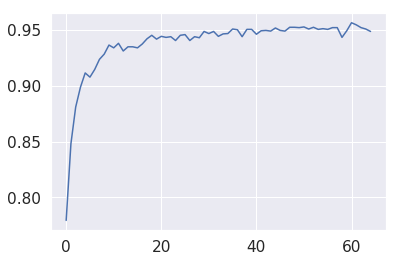

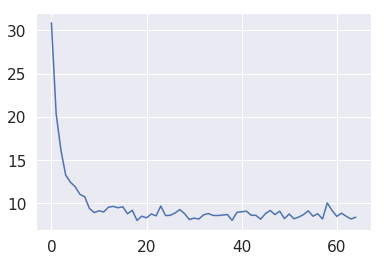


[65] accuracy: 0.949 loss: 8.418

runtime :  32453.739814043045
Train
[66, 00020] loss: 0.029 acc: 1.000
[66, 00040] loss: 0.059 acc: 1.000
[66, 00060] loss: 0.110 acc: 1.000
[66, 00080] loss: 0.146 acc: 1.000
[66, 00100] loss: 0.182 acc: 1.000
[66, 00120] loss: 0.280 acc: 1.000
[66, 00140] loss: 0.321 acc: 1.000
[66, 00160] loss: 0.348 acc: 1.000
[66, 00180] loss: 0.380 acc: 1.000
[66, 00200] loss: 0.411 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

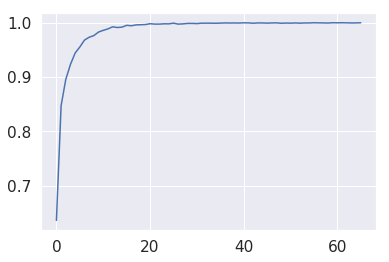

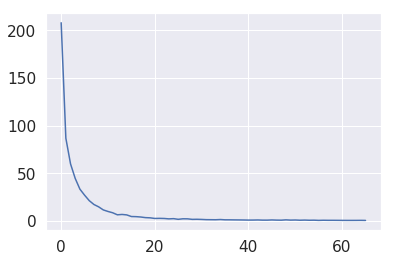

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.625275388360023, 8.80841

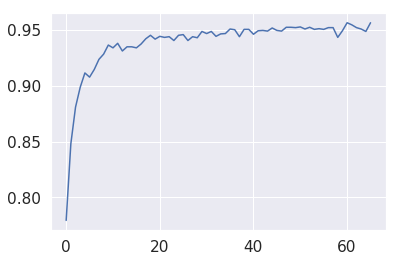

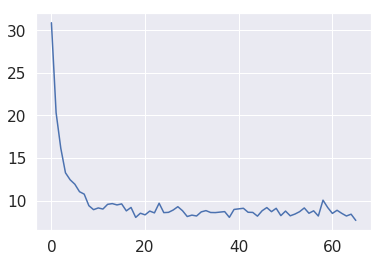


[66] accuracy: 0.957 loss: 7.689

runtime :  32973.547605752945
Train
[67, 00020] loss: 0.049 acc: 0.999
[67, 00040] loss: 0.098 acc: 1.000
[67, 00060] loss: 0.151 acc: 0.999
[67, 00080] loss: 0.181 acc: 1.000
[67, 00100] loss: 0.214 acc: 1.000
[67, 00120] loss: 0.248 acc: 1.000
[67, 00140] loss: 0.281 acc: 1.000
[67, 00160] loss: 0.353 acc: 1.000
[67, 00180] loss: 0.432 acc: 1.000
[67, 00200] loss: 0.465 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

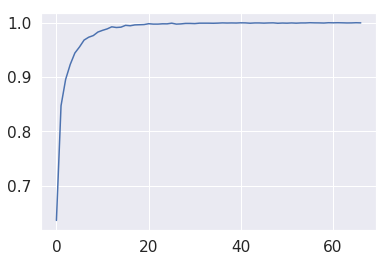

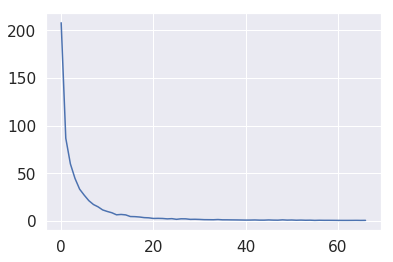

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.6252753883600

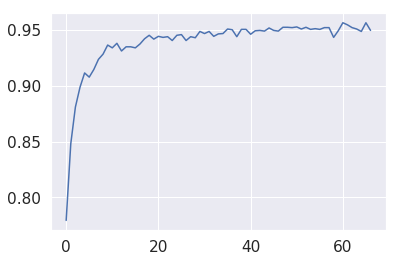

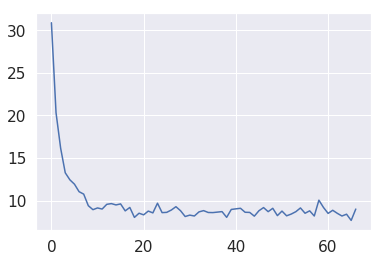


[67] accuracy: 0.950 loss: 9.020

runtime :  33490.84856772423
Train
[68, 00020] loss: 0.026 acc: 1.000
[68, 00040] loss: 0.071 acc: 1.000
[68, 00060] loss: 0.100 acc: 1.000
[68, 00080] loss: 0.150 acc: 1.000
[68, 00100] loss: 0.208 acc: 1.000
[68, 00120] loss: 0.286 acc: 0.999
[68, 00140] loss: 0.340 acc: 0.999
[68, 00160] loss: 0.378 acc: 0.999
[68, 00180] loss: 0.405 acc: 0.999
[68, 00200] loss: 0.435 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

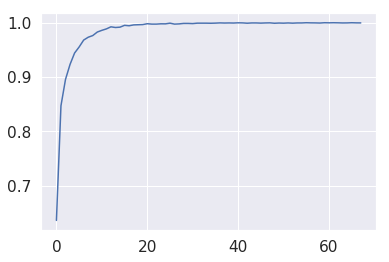

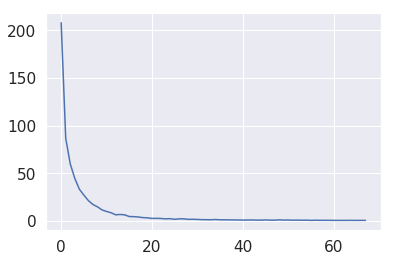

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.505185261368752, 9.62

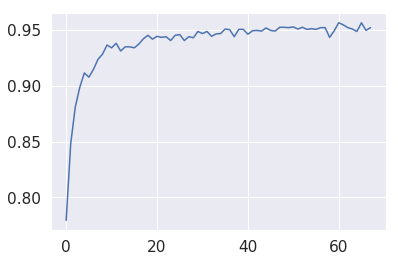

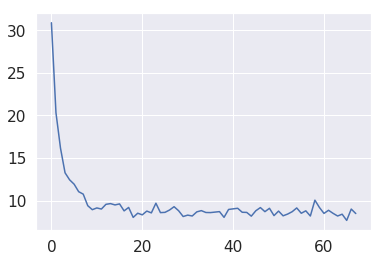


[68] accuracy: 0.952 loss: 8.495

runtime :  34009.60239315033
Train
[69, 00020] loss: 0.063 acc: 0.998
[69, 00040] loss: 0.111 acc: 0.999
[69, 00060] loss: 0.151 acc: 0.999
[69, 00080] loss: 0.190 acc: 1.000
[69, 00100] loss: 0.215 acc: 1.000
[69, 00120] loss: 0.239 acc: 1.000
[69, 00140] loss: 0.275 acc: 1.000
[69, 00160] loss: 0.304 acc: 1.000
[69, 00180] loss: 0.320 acc: 1.000
[69, 00200] loss: 0.373 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

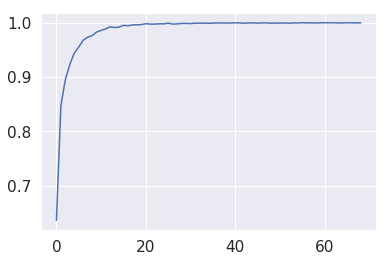

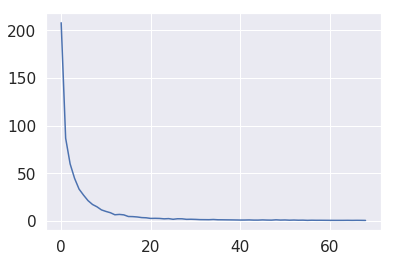

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.50518526136875

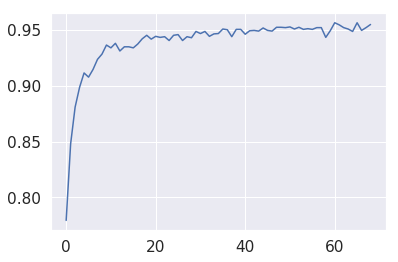

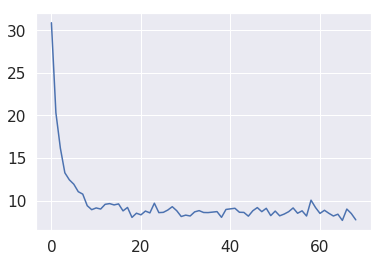


[69] accuracy: 0.955 loss: 7.756

runtime :  34528.4677233696
Train
[70, 00020] loss: 0.049 acc: 0.999
[70, 00040] loss: 0.093 acc: 1.000
[70, 00060] loss: 0.115 acc: 1.000
[70, 00080] loss: 0.157 acc: 1.000
[70, 00100] loss: 0.191 acc: 1.000
[70, 00120] loss: 0.218 acc: 1.000
[70, 00140] loss: 0.239 acc: 1.000
[70, 00160] loss: 0.335 acc: 1.000
[70, 00180] loss: 0.390 acc: 1.000
[70, 00200] loss: 0.447 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0.

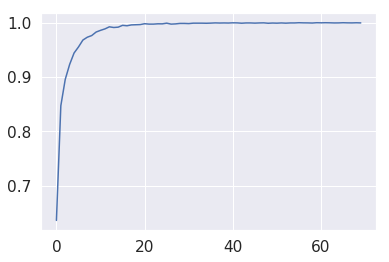

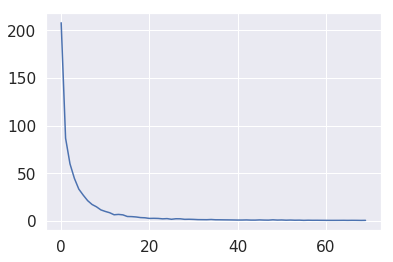

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068, 9.50518526

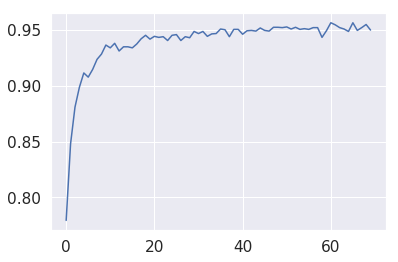

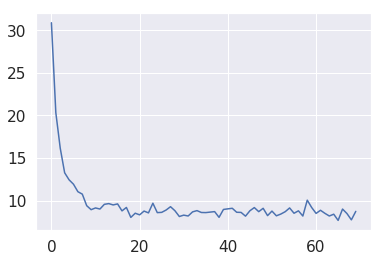


[70] accuracy: 0.950 loss: 8.750

runtime :  35047.29171490669
Train
[71, 00020] loss: 0.024 acc: 1.000
[71, 00040] loss: 0.072 acc: 1.000
[71, 00060] loss: 0.095 acc: 1.000
[71, 00080] loss: 0.142 acc: 1.000
[71, 00100] loss: 0.183 acc: 1.000
[71, 00120] loss: 0.223 acc: 1.000
[71, 00140] loss: 0.311 acc: 1.000
[71, 00160] loss: 0.372 acc: 1.000
[71, 00180] loss: 0.398 acc: 1.000
[71, 00200] loss: 0.447 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

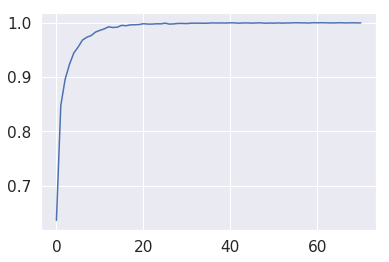

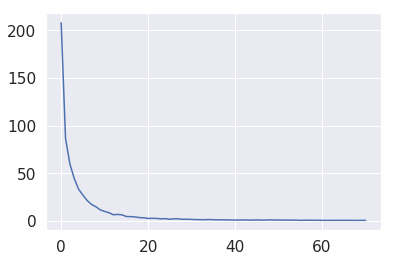

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.660544283688068,

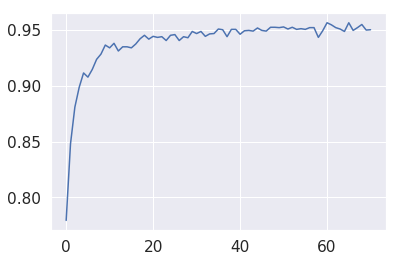

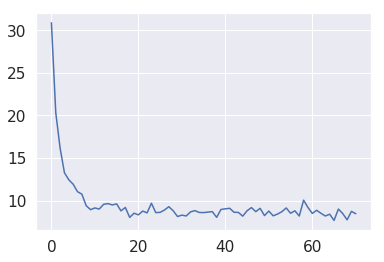


[71] accuracy: 0.950 loss: 8.476

runtime :  35565.34816765785
Train
[72, 00020] loss: 0.017 acc: 1.000
[72, 00040] loss: 0.041 acc: 1.000
[72, 00060] loss: 0.072 acc: 1.000
[72, 00080] loss: 0.119 acc: 1.000
[72, 00100] loss: 0.195 acc: 1.000
[72, 00120] loss: 0.221 acc: 1.000
[72, 00140] loss: 0.251 acc: 1.000
[72, 00160] loss: 0.276 acc: 1.000
[72, 00180] loss: 0.440 acc: 1.000
[72, 00200] loss: 0.460 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

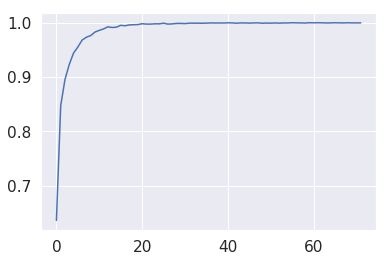

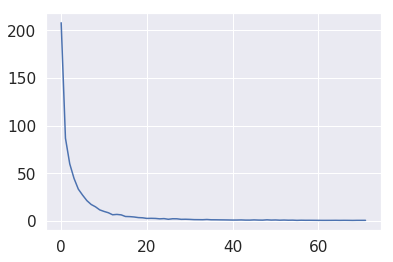

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095, 9.6605442

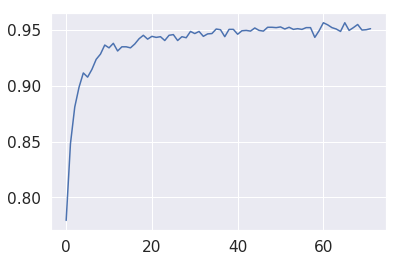

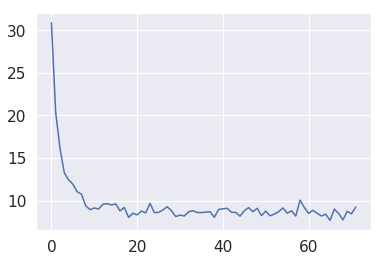


[72] accuracy: 0.951 loss: 9.260

runtime :  36084.42509436607
Train
[73, 00020] loss: 0.033 acc: 1.000
[73, 00040] loss: 0.086 acc: 1.000
[73, 00060] loss: 0.127 acc: 1.000
[73, 00080] loss: 0.155 acc: 1.000
[73, 00100] loss: 0.182 acc: 1.000
[73, 00120] loss: 0.214 acc: 1.000
[73, 00140] loss: 0.287 acc: 1.000
[73, 00160] loss: 0.332 acc: 1.000
[73, 00180] loss: 0.368 acc: 1.000
[73, 00200] loss: 0.395 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

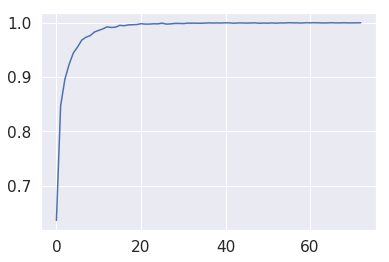

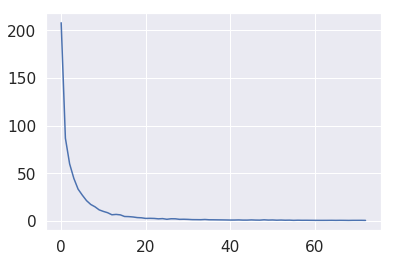

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.575484573841095

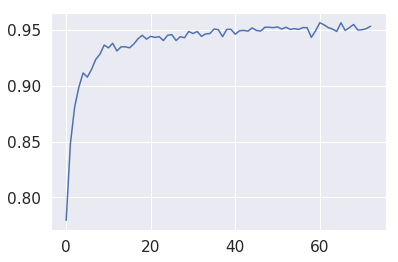

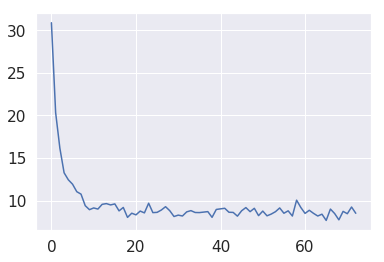


[73] accuracy: 0.953 loss: 8.525

runtime :  36600.28566646576
Train
[74, 00020] loss: 0.019 acc: 1.000
[74, 00040] loss: 0.050 acc: 1.000
[74, 00060] loss: 0.081 acc: 1.000
[74, 00080] loss: 0.108 acc: 1.000
[74, 00100] loss: 0.161 acc: 1.000
[74, 00120] loss: 0.198 acc: 1.000
[74, 00140] loss: 0.266 acc: 1.000
[74, 00160] loss: 0.307 acc: 1.000
[74, 00180] loss: 0.329 acc: 1.000
[74, 00200] loss: 0.411 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

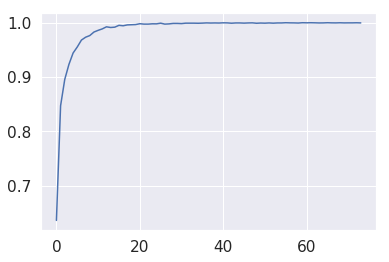

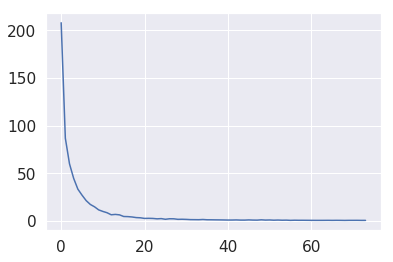

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754604, 9.5754

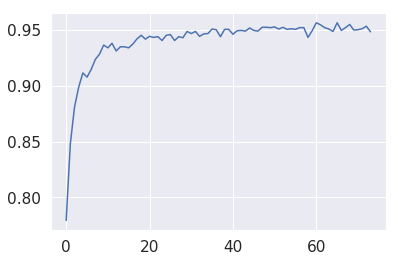

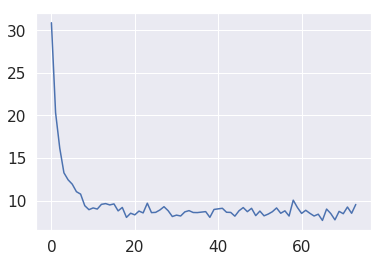


[74] accuracy: 0.948 loss: 9.561

runtime :  37121.66710519791
Train
[75, 00020] loss: 0.045 acc: 1.000
[75, 00040] loss: 0.099 acc: 1.000
[75, 00060] loss: 0.174 acc: 0.999
[75, 00080] loss: 0.202 acc: 1.000
[75, 00100] loss: 0.238 acc: 1.000
[75, 00120] loss: 0.258 acc: 1.000
[75, 00140] loss: 0.273 acc: 1.000
[75, 00160] loss: 0.389 acc: 1.000
[75, 00180] loss: 0.414 acc: 1.000
[75, 00200] loss: 0.453 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

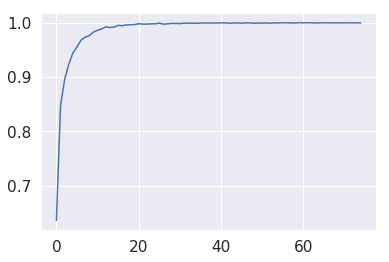

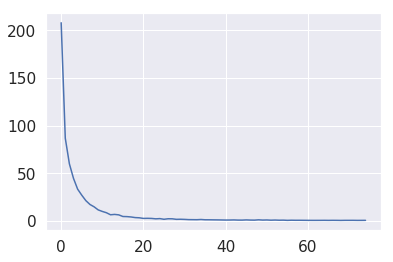

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.022716365754

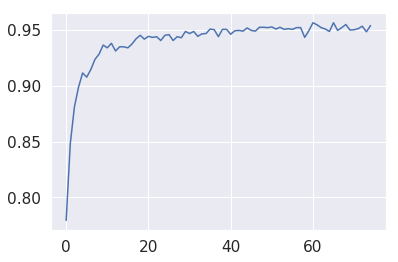

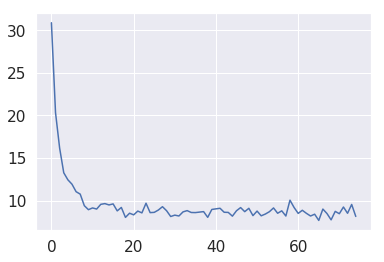


[75] accuracy: 0.954 loss: 8.156

runtime :  37637.455709695816
Train
[76, 00020] loss: 0.053 acc: 0.999
[76, 00040] loss: 0.068 acc: 1.000
[76, 00060] loss: 0.105 acc: 1.000
[76, 00080] loss: 0.132 acc: 1.000
[76, 00100] loss: 0.160 acc: 1.000
[76, 00120] loss: 0.185 acc: 1.000
[76, 00140] loss: 0.245 acc: 1.000
[76, 00160] loss: 0.264 acc: 1.000
[76, 00180] loss: 0.308 acc: 1.000
[76, 00200] loss: 0.331 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

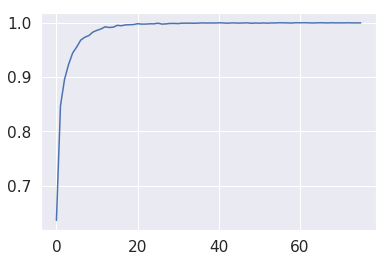

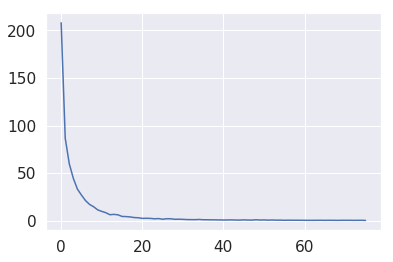

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063999176, 9.0

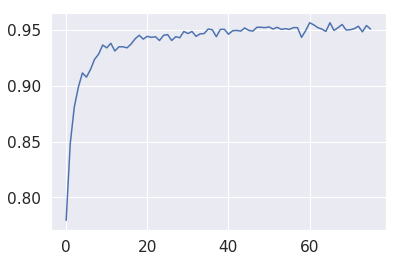

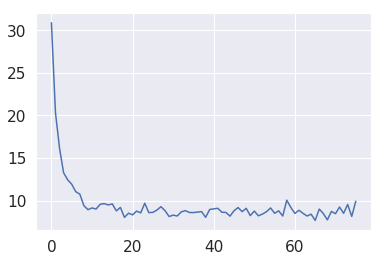


[76] accuracy: 0.951 loss: 9.939

runtime :  38152.30225253105
Train
[77, 00020] loss: 0.027 acc: 1.000
[77, 00040] loss: 0.079 acc: 1.000
[77, 00060] loss: 0.101 acc: 1.000
[77, 00080] loss: 0.122 acc: 1.000
[77, 00100] loss: 0.145 acc: 1.000
[77, 00120] loss: 0.171 acc: 1.000
[77, 00140] loss: 0.199 acc: 1.000
[77, 00160] loss: 0.226 acc: 1.000
[77, 00180] loss: 0.264 acc: 1.000
[77, 00200] loss: 0.321 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

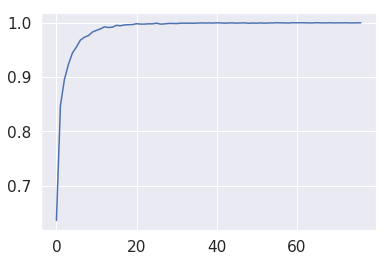

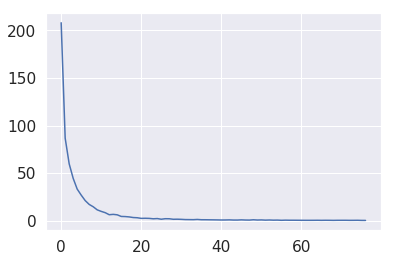

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 9.15242063

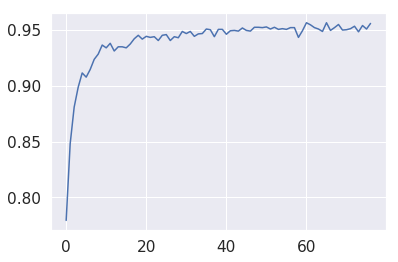

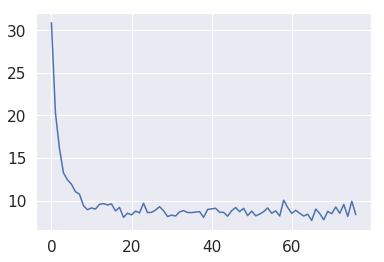


[77] accuracy: 0.956 loss: 8.367

runtime :  38668.00535440445
Train
[78, 00020] loss: 0.053 acc: 0.999
[78, 00040] loss: 0.082 acc: 1.000
[78, 00060] loss: 0.120 acc: 1.000
[78, 00080] loss: 0.180 acc: 1.000
[78, 00100] loss: 0.236 acc: 1.000
[78, 00120] loss: 0.307 acc: 0.999
[78, 00140] loss: 0.328 acc: 0.999
[78, 00160] loss: 0.354 acc: 1.000
[78, 00180] loss: 0.373 acc: 1.000
[78, 00200] loss: 0.403 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

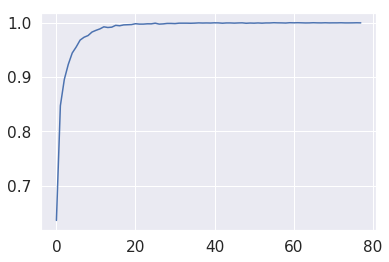

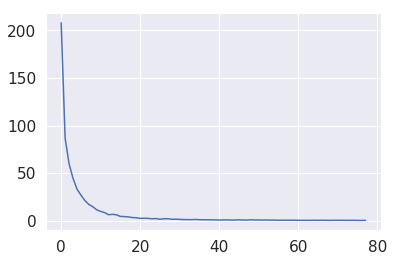

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924658536911, 

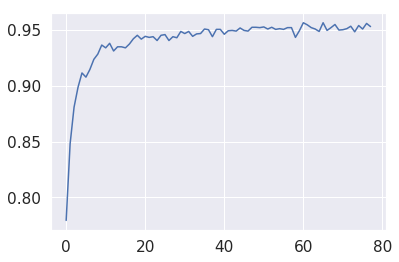

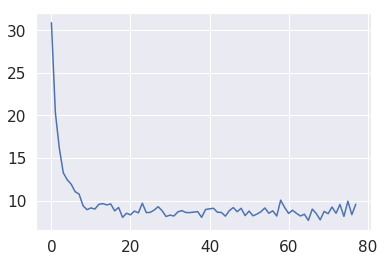


[78] accuracy: 0.953 loss: 9.592

runtime :  39181.24748778343
Train
[79, 00020] loss: 0.020 acc: 1.000
[79, 00040] loss: 0.052 acc: 1.000
[79, 00060] loss: 0.096 acc: 1.000
[79, 00080] loss: 0.123 acc: 1.000
[79, 00100] loss: 0.145 acc: 1.000
[79, 00120] loss: 0.174 acc: 1.000
[79, 00140] loss: 0.184 acc: 1.000
[79, 00160] loss: 0.216 acc: 1.000
[79, 00180] loss: 0.258 acc: 1.000
[79, 00200] loss: 0.283 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

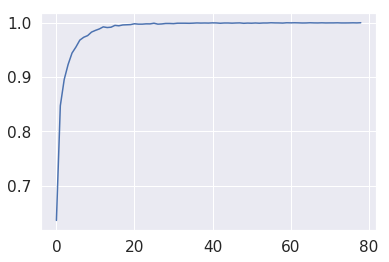

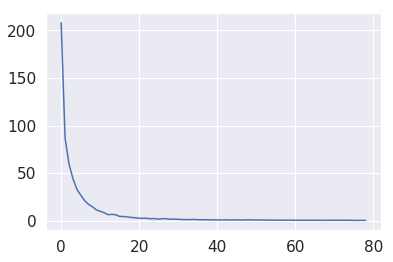

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319, 8.94924

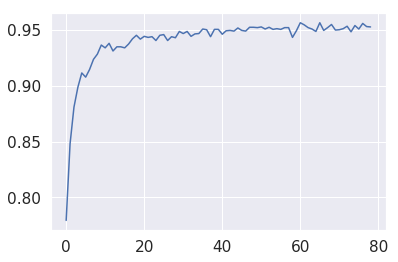

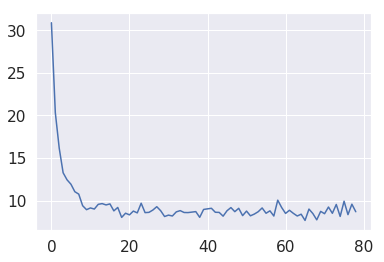


[79] accuracy: 0.953 loss: 8.705

runtime :  39696.448713064194
Train
[80, 00020] loss: 0.051 acc: 0.999
[80, 00040] loss: 0.094 acc: 0.999
[80, 00060] loss: 0.133 acc: 0.999
[80, 00080] loss: 0.153 acc: 1.000
[80, 00100] loss: 0.163 acc: 1.000
[80, 00120] loss: 0.183 acc: 1.000
[80, 00140] loss: 0.203 acc: 1.000
[80, 00160] loss: 0.223 acc: 1.000
[80, 00180] loss: 0.271 acc: 1.000
[80, 00200] loss: 0.294 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

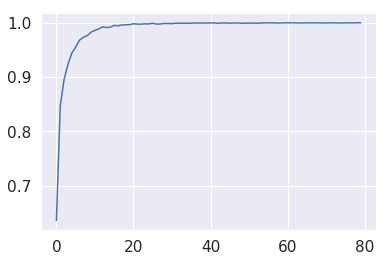

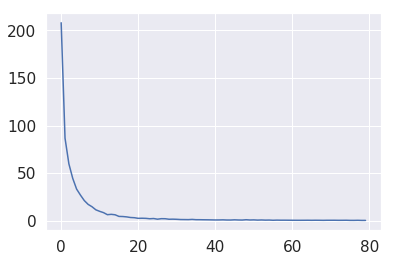

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125, 0.9575]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.416300192475319,

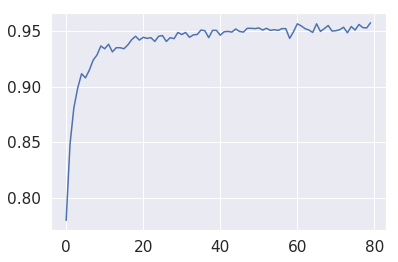

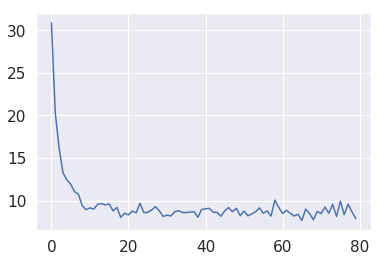


[80] accuracy: 0.958 loss: 7.896

runtime :  40214.14090228081
Train
[81, 00020] loss: 0.027 acc: 1.000
[81, 00040] loss: 0.071 acc: 1.000
[81, 00060] loss: 0.090 acc: 1.000
[81, 00080] loss: 0.108 acc: 1.000
[81, 00100] loss: 0.135 acc: 1.000
[81, 00120] loss: 0.166 acc: 1.000
[81, 00140] loss: 0.247 acc: 1.000
[81, 00160] loss: 0.268 acc: 1.000
[81, 00180] loss: 0.307 acc: 1.000
[81, 00200] loss: 0.328 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

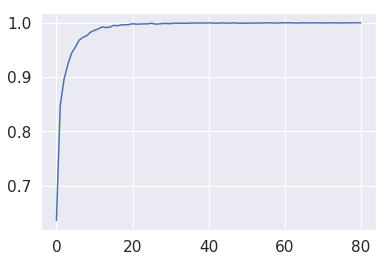

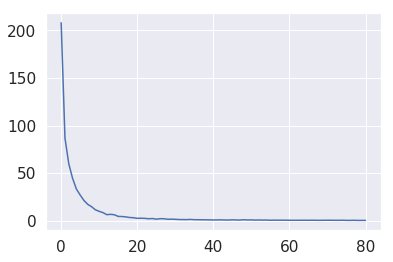

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125, 0.9575, 0.9525]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565, 9.41630019

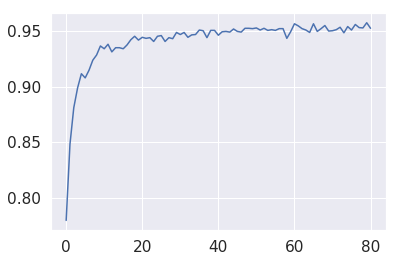

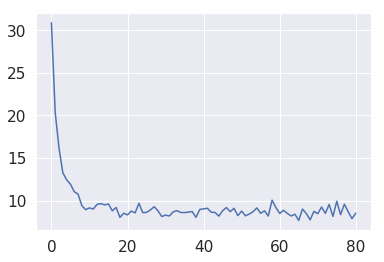


[81] accuracy: 0.953 loss: 8.540

runtime :  40721.336002111435
Train
[82, 00020] loss: 0.042 acc: 1.000
[82, 00040] loss: 0.088 acc: 1.000
[82, 00060] loss: 0.106 acc: 1.000
[82, 00080] loss: 0.164 acc: 1.000
[82, 00100] loss: 0.193 acc: 1.000
[82, 00120] loss: 0.228 acc: 1.000
[82, 00140] loss: 0.240 acc: 1.000
[82, 00160] loss: 0.284 acc: 1.000
[82, 00180] loss: 0.313 acc: 1.000
[82, 00200] loss: 0.379 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

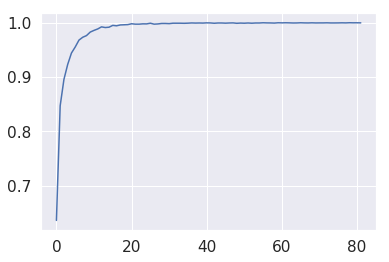

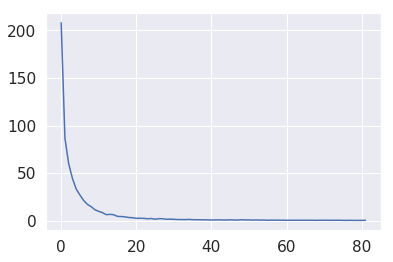

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125, 0.9575, 0.9525, 0.9528125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856920957565,

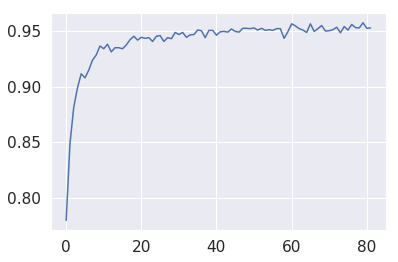

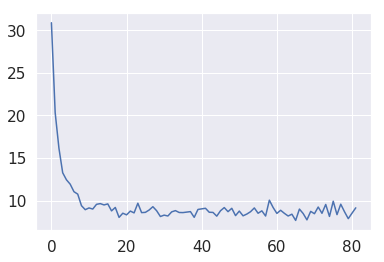


[82] accuracy: 0.953 loss: 9.166

runtime :  41239.66842007637
Train
[83, 00020] loss: 0.033 acc: 1.000
[83, 00040] loss: 0.056 acc: 1.000
[83, 00060] loss: 0.110 acc: 1.000
[83, 00080] loss: 0.133 acc: 1.000
[83, 00100] loss: 0.155 acc: 1.000
[83, 00120] loss: 0.181 acc: 1.000
[83, 00140] loss: 0.243 acc: 1.000
[83, 00160] loss: 0.262 acc: 1.000
[83, 00180] loss: 0.298 acc: 1.000
[83, 00200] loss: 0.332 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

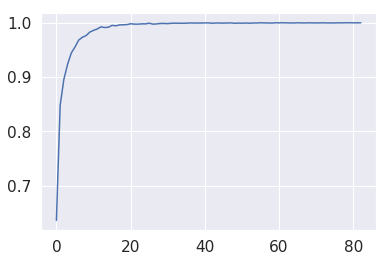

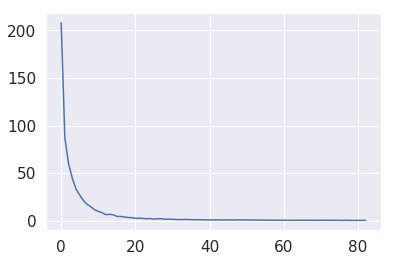

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125, 0.9575, 0.9525, 0.9528125, 0.954375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537, 10.772856

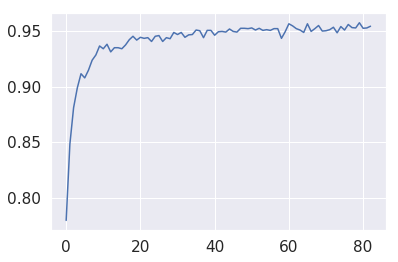

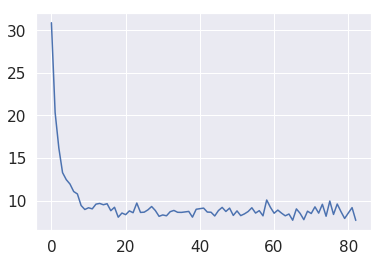


[83] accuracy: 0.954 loss: 7.666

runtime :  41755.17575478554
Train
[84, 00020] loss: 0.032 acc: 1.000
[84, 00040] loss: 0.055 acc: 1.000
[84, 00060] loss: 0.073 acc: 1.000
[84, 00080] loss: 0.106 acc: 1.000
[84, 00100] loss: 0.137 acc: 1.000
[84, 00120] loss: 0.152 acc: 1.000
[84, 00140] loss: 0.182 acc: 1.000
[84, 00160] loss: 0.218 acc: 1.000
[84, 00180] loss: 0.256 acc: 1.000
[84, 00200] loss: 0.276 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

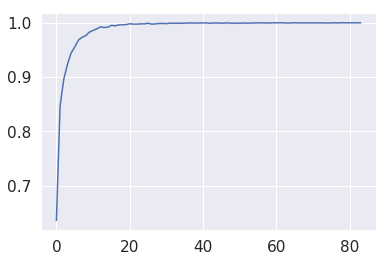

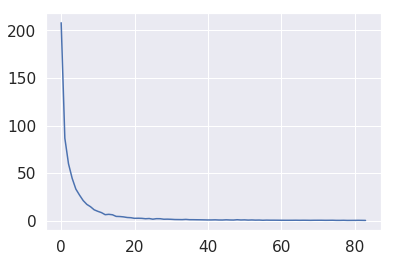

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125, 0.9575, 0.9525, 0.9528125, 0.954375, 0.9534375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.057663712650537

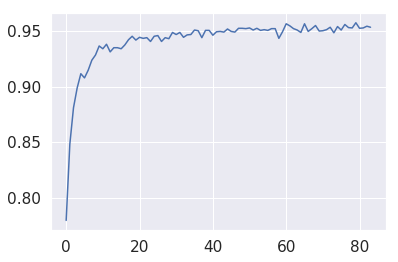

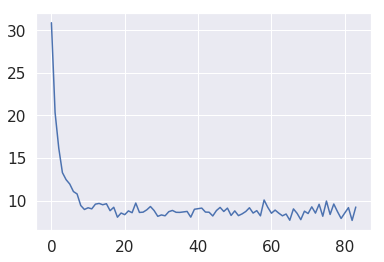


[84] accuracy: 0.953 loss: 9.237

runtime :  42272.46125793457
Train
[85, 00020] loss: 0.039 acc: 0.999
[85, 00040] loss: 0.066 acc: 1.000
[85, 00060] loss: 0.103 acc: 1.000
[85, 00080] loss: 0.135 acc: 1.000
[85, 00100] loss: 0.152 acc: 1.000
[85, 00120] loss: 0.175 acc: 1.000
[85, 00140] loss: 0.186 acc: 1.000
[85, 00160] loss: 0.206 acc: 1.000
[85, 00180] loss: 0.222 acc: 1.000
[85, 00200] loss: 0.234 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

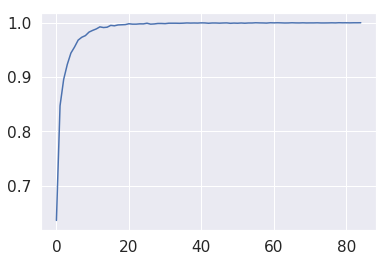

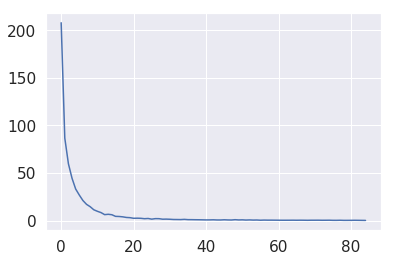

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125, 0.9575, 0.9525, 0.9528125, 0.954375, 0.9534375, 0.9509375]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302, 11.0576

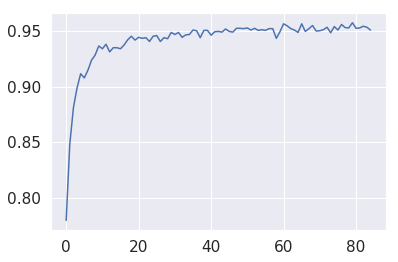

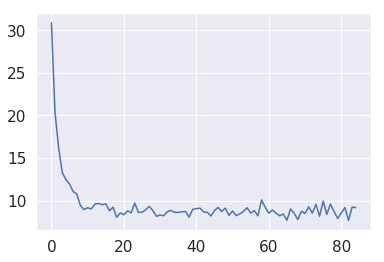


[85] accuracy: 0.951 loss: 9.166

runtime :  42785.228764534
Train
[86, 00020] loss: 0.030 acc: 1.000
[86, 00040] loss: 0.060 acc: 1.000
[86, 00060] loss: 0.077 acc: 1.000
[86, 00080] loss: 0.090 acc: 1.000
[86, 00100] loss: 0.112 acc: 1.000
[86, 00120] loss: 0.126 acc: 1.000
[86, 00140] loss: 0.159 acc: 1.000
[86, 00160] loss: 0.196 acc: 1.000
[86, 00180] loss: 0.238 acc: 1.000
[86, 00200] loss: 0.256 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0.9

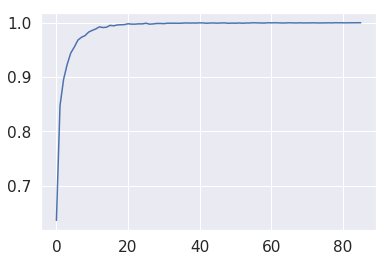

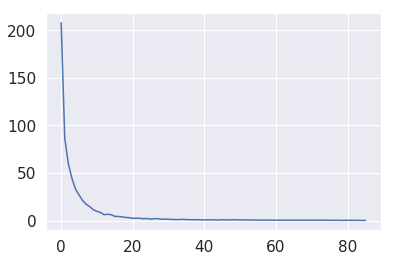

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125, 0.9575, 0.9525, 0.9528125, 0.954375, 0.9534375, 0.9509375, 0.9525]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670467287302,

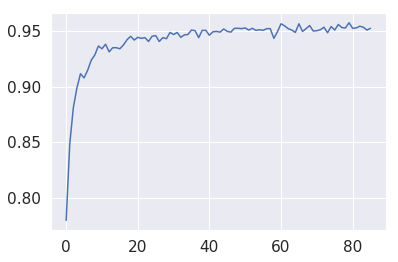

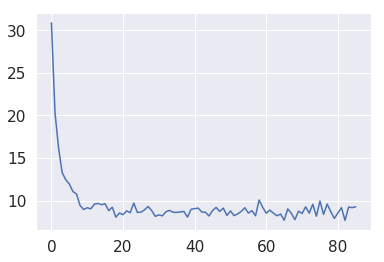


[86] accuracy: 0.953 loss: 9.271

runtime :  43305.19853186607
Train
[87, 00020] loss: 0.011 acc: 1.000
[87, 00040] loss: 0.043 acc: 1.000
[87, 00060] loss: 0.084 acc: 0.999
[87, 00080] loss: 0.117 acc: 0.999
[87, 00100] loss: 0.137 acc: 1.000
[87, 00120] loss: 0.151 acc: 1.000
[87, 00140] loss: 0.181 acc: 1.000
[87, 00160] loss: 0.202 acc: 1.000
[87, 00180] loss: 0.232 acc: 1.000
[87, 00200] loss: 0.251 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

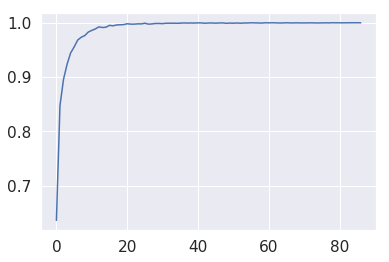

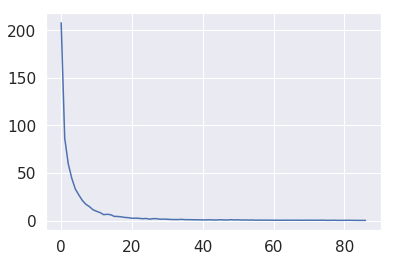

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125, 0.9575, 0.9525, 0.9528125, 0.954375, 0.9534375, 0.9509375, 0.9525, 0.953125]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 11.93670

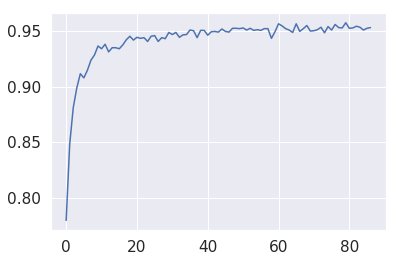

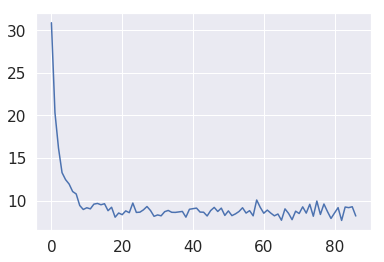


[87] accuracy: 0.953 loss: 8.185

runtime :  43818.637045145035
Train
[88, 00020] loss: 0.036 acc: 0.999
[88, 00040] loss: 0.080 acc: 1.000
[88, 00060] loss: 0.133 acc: 0.999
[88, 00080] loss: 0.157 acc: 1.000
[88, 00100] loss: 0.176 acc: 1.000
[88, 00120] loss: 0.231 acc: 0.999
[88, 00140] loss: 0.250 acc: 1.000
[88, 00160] loss: 0.272 acc: 1.000
[88, 00180] loss: 0.289 acc: 1.000
[88, 00200] loss: 0.305 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 

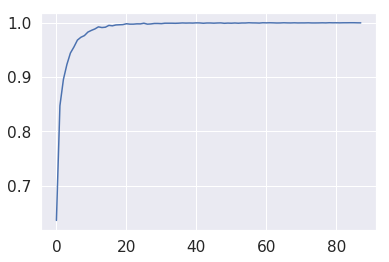

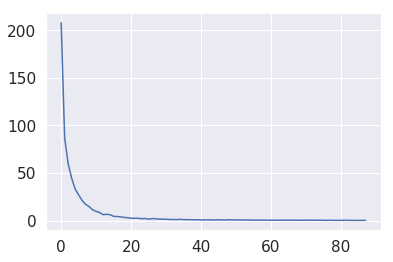

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125, 0.9575, 0.9525, 0.9528125, 0.954375, 0.9534375, 0.9509375, 0.9525, 0.953125, 0.955]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175498962, 1

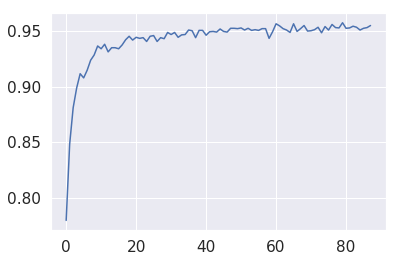

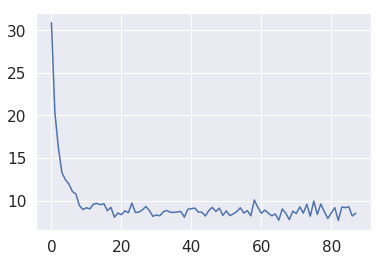


[88] accuracy: 0.955 loss: 8.517

runtime :  44331.8271009922
Train
[89, 00020] loss: 0.025 acc: 1.000
[89, 00040] loss: 0.055 acc: 1.000
[89, 00060] loss: 0.091 acc: 1.000
[89, 00080] loss: 0.114 acc: 1.000
[89, 00100] loss: 0.131 acc: 1.000
[89, 00120] loss: 0.147 acc: 1.000
[89, 00140] loss: 0.160 acc: 1.000
[89, 00160] loss: 0.184 acc: 1.000
[89, 00180] loss: 0.211 acc: 1.000
[89, 00200] loss: 0.233 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0.

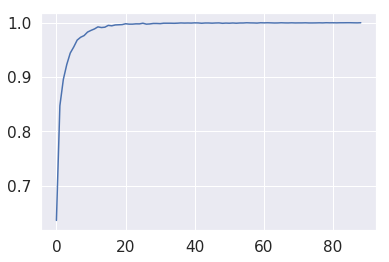

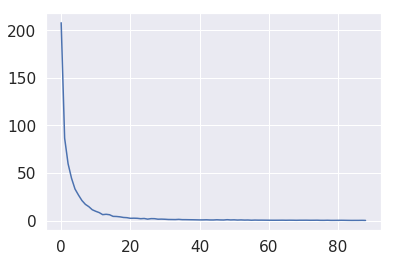

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125, 0.9575, 0.9525, 0.9528125, 0.954375, 0.9534375, 0.9509375, 0.9525, 0.953125, 0.955, 0.95625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12.453026175

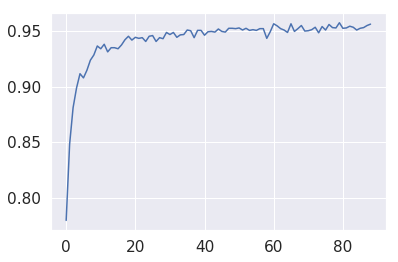

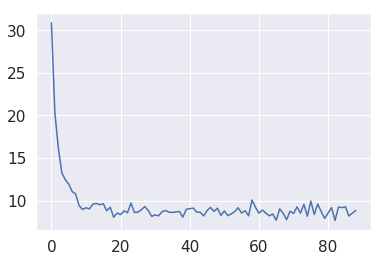


[89] accuracy: 0.956 loss: 8.838

runtime :  44849.35919523239
Train
[90, 00020] loss: 0.032 acc: 0.999
[90, 00040] loss: 0.051 acc: 1.000
[90, 00060] loss: 0.075 acc: 1.000
[90, 00080] loss: 0.113 acc: 1.000
[90, 00100] loss: 0.132 acc: 1.000
[90, 00120] loss: 0.161 acc: 1.000
[90, 00140] loss: 0.175 acc: 1.000
[90, 00160] loss: 0.196 acc: 1.000
[90, 00180] loss: 0.235 acc: 1.000
[90, 00200] loss: 0.259 acc: 1.000
[0.63609375, 0.847109375, 0.895625, 0.923203125, 0.944140625, 0.955234375, 0.96796875, 0.973203125, 0.97625, 0.982734375, 0.985859375, 0.988515625, 0.99234375, 0.99109375, 0.99171875, 0.995078125, 0.994296875, 0.995859375, 0.996171875, 0.996484375, 0.998046875, 0.99734375, 0.99734375, 0.997890625, 0.9978125, 0.9990625, 0.99734375, 0.997734375, 0.99859375, 0.99859375, 0.99828125, 0.9990625, 0.9990625, 0.9990625, 0.99890625, 0.999140625, 0.99953125, 0.999296875, 0.999453125, 0.999296875, 0.9996875, 0.99953125, 0.998984375, 0.999453125, 0.999453125, 0.999140625, 0.999453125, 0

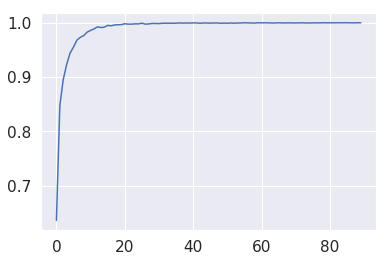

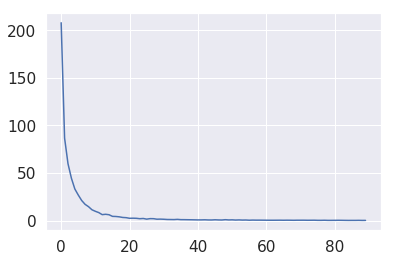

Validation
[0.779375, 0.848125, 0.8809375, 0.89875, 0.9115625, 0.9078125, 0.9146875, 0.92375, 0.9284375, 0.9365625, 0.9340625, 0.938125, 0.93125, 0.935, 0.935, 0.9340625, 0.9375, 0.9421875, 0.9453125, 0.941875, 0.944375, 0.9434375, 0.9440625, 0.940625, 0.9453125, 0.9459375, 0.940625, 0.9440625, 0.943125, 0.94875, 0.946875, 0.94875, 0.944375, 0.9465625, 0.946875, 0.9509375, 0.9503125, 0.9440625, 0.950625, 0.950625, 0.94625, 0.949375, 0.9496875, 0.9490625, 0.951875, 0.9496875, 0.9490625, 0.9525, 0.9525, 0.9521875, 0.9528125, 0.9509375, 0.9525, 0.950625, 0.95125, 0.950625, 0.9521875, 0.9521875, 0.9434375, 0.949375, 0.9565625, 0.9546875, 0.9521875, 0.9509375, 0.94875, 0.9565625, 0.9496875, 0.9521875, 0.955, 0.95, 0.9503125, 0.95125, 0.9534375, 0.9484375, 0.9540625, 0.9509375, 0.9559375, 0.953125, 0.9528125, 0.9575, 0.9525, 0.9528125, 0.954375, 0.9534375, 0.9509375, 0.9525, 0.953125, 0.955, 0.95625, 0.955625]
[30.875142335891724, 20.32009506225586, 16.161957800388336, 13.276535019278526, 12

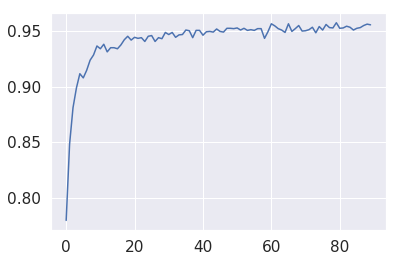

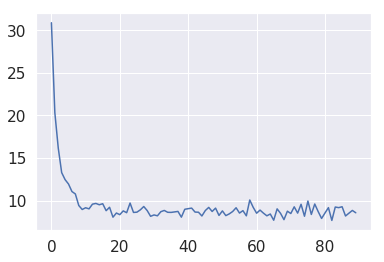


[90] accuracy: 0.956 loss: 8.562

runtime :  45365.928047180176
Train
[91, 00020] loss: 0.013 acc: 1.000


In [ ]:
train_acc = []
train_loss = []
val_acc = []
val_loss = []
import time
start_time = time.time()
for epoch in range(EPOCH):
    print("Train")
    total = 0
    correct = 0
    running_loss = 0.0
    for step, (labels, images,_) in enumerate(trainloader):
        optimizer.zero_grad()
#         print("in Train: ", images.shape, labels.shape)
#         images = images.detach()
#         labels = labels.detach()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
        outputs = model(images)
        
        # loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        acc = correct / total

        if step % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %05d] loss: %.3f acc: %.3f' %
                  (epoch + 1, step + 1, running_loss, acc))

    train_acc.append(acc)
    train_loss.append(running_loss)
    print(train_acc)
    print(train_loss)
    plt.figure()
    plt.plot(range(0,epoch+1), train_acc)
    plt.savefig(model_directory + "train_acc_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,epoch+1), train_loss)
    plt.savefig(model_directory + "train_loss_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    
    # Evaluate validation set
    print("Validation")
    total = 0
    correct = 0
    running_loss = 0.0
    for step, (labels, images,_) in enumerate(valloader):
        optimizer.zero_grad()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
#         images = images.detach()
#         labels = labels.detach()
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        running_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        acc = correct / total
    
    val_acc.append(acc)
    val_loss.append(running_loss)
    print(val_acc)
    print(val_loss)
    plt.figure()
    plt.plot(range(0,epoch+1), val_acc)
    plt.savefig(model_directory + "val_acc_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,epoch+1), val_loss)
    plt.savefig(model_directory + "val_loss_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    
    print('\n[%d] accuracy: %.3f loss: %.3f\n' % (epoch + 1, acc, running_loss))
    running_loss = 0.0
    # Saving model
    model_path = PJ(model_directory, "%03d_weights.pt" % (epoch+1))
    torch.save(model.state_dict(), model_path)
    runtime = time.time() - start_time
    print("runtime : ", runtime)

In [ ]:
print("runtime : ", runtime)
resultfile = open(model_directory+"train_results.txt", "a")
resultfile.write("train")
resultfile.write(str(train_acc))
resultfile.write("\n")
resultfile.write(str(train_loss))
resultfile.write("\n")
resultfile.write("validation")
resultfile.write("\n")
resultfile.write(str(val_acc))
resultfile.write("\n")
resultfile.write(str(val_loss))
resultfile.write("\n")
resultfile.close()

# TEST
### evaluate
### test every model
### saliency map

In [ ]:
transform = transform_set(train=False)
testset = TermiteDataset(TestFile, transform)
testloader = Data.DataLoader(
    dataset=testset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
test_acc = []
test_loss = []
import time
start = time.time()
# classes2 = ["O. formosanus Worker","C. formosanus Worker", "C. domesticus Worker", "R. flaviceps Worker"]
for model_num in range(1, EPOCH+1):
    wrong_images = []
    wrong_answer = []
    actual_answer = []
    right_images = []
    right_answer = []
    weight_path = model_directory + "%03d_weights.pt" % (model_num)
    state_dict = torch.load(weight_path, map_location='cuda:0')
    model.load_state_dict(state_dict)
    running_loss = 0.0
    total = 0
    correct = 0
    confusion_matrix = torch.zeros(len(classes), len(classes))
    for step, (labels, images, paths) in enumerate(testloader):
        optimizer.zero_grad()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        # append to the wrong list (test log file)
        for i in range(len(predicted)):
            if predicted[i] != labels[i]:
#                 print(paths[i], predicted[i], labels[i])
                wrong_images.append(paths[i])
                wrong_answer.append(predicted[i].item())
                actual_answer.append(labels[i].item())
            else:
                right_images.append(paths[i])
                right_answer.append(labels[i].item())
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for t, p in zip(labels.view(-1), predicted.view(-1)):
#             print(t.item(), p.item())
#             mapp = { 1: 0,
#                     3: 1,
#                     5: 2,
#                     6: 3}
#             confusion_matrix[mapp[t.item()], mapp[p.item()]] += 1
            confusion_matrix[t.item(), p.item()] += 1
    
    running_acc = correct / total
    print('\n[%d] accuracy: %.3f loss: %.3f\n' % (model_num, running_acc, running_loss))
    
    test_acc.append(running_acc)
    test_loss.append(running_loss)
#     print(test_acc)
#     print(test_loss)
    plt.figure()
    plt.plot(range(0,model_num), test_acc)
    plt.savefig(testresult_directory + "test_acc_E%03d.jpg" % (model_num), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,model_num), test_loss)
    plt.savefig(testresult_directory + "test_loss_E%03d.jpg" % (model_num), dpi=500)
    plt.show()
    
    
#     print(wrong_answer)
    with open(testresult_directory + "%03d_wrong.txt" % (model_num), 'w') as wrong:
#         c = zip(wrong_images, wrong_answer, actual_answer)
#         c = sorted(c)
#         (wrong_images, wrong_answer, actual_answer) = zip(*c)
#         print(wrong_images)
        for i in range(len(wrong_images)):
            wrong.write(wrong_images[i] + " " + classes[wrong_answer[i]] + " " + classes[actual_answer[i]])
#             print(wrong_images[i] + " " + classes[wrong_answer[i]] + " " + classes[actual_answer[i]])
            wrong.write("\n")
        wrong.close()
#     print(confusion_matrix)
#
    with open(testresult_directory + "%03d_right.txt" % (model_num), 'w') as wrong:
#         c = zip(wrong_images, wrong_answer, actual_answer)
#         c = sorted(c)
#         (wrong_images, wrong_answer, actual_answer) = zip(*c)
#         print(wrong_images)
        for i in range(len(right_images)):
            wrong.write(right_images[i] + " " + classes[right_answer[i]])
#             print(wrong_images[i] + " " + classes[wrong_answer[i]] + " " + classes[actual_answer[i]])
            wrong.write("\n")
        wrong.close()
#     print(confusion_matrix)

    confusion_matrix = confusion_matrix.numpy().astype(int)
#     print(confusion_matrix)
    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in classes],
                  columns = [i for i in classes])
#     print(df_cm)
    sn.set(font_scale=1.4)#for label size
#     print(classes)
    img = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="d")
    figure = img.get_figure()
    plt.tight_layout()
    plt.savefig(testresult_directory + "confusion_matrix_%03d.jpg" % (model_num), dpi=500)
    plt.show()
    runtime = time.time() - start
    print("runtime : ", runtime)

In [ ]:
print("runtime : ", runtime)
resultfile = open(testresult_directory+"test_results.txt", "a")
resultfile.write("test")
resultfile.write("\n")
resultfile.write(str(test_acc))
resultfile.write("\n")
resultfile.write(str(test_loss))
resultfile.write("\n")
resultfile.close()
